## Bike Sharing Assignment

#### Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

### 1. Library Handling 

- Let's start importing the required libraries which is required for model building!!

In [1]:
# importing warnings to filter the warning messages
import warnings
warnings.filterwarnings('ignore')

# importing numpy to deal with the mathematical operations on Arrays 
# importing pandas to deal with the data present in the form of DataFrames
import numpy as np
import pandas as pd 

# importing plotly for the data visualizations
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# importing scikit-learn useful for model-building
import sklearn 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# also importing statsmodels useful for model-building
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### 2. Loading & Analysing Bike Data

- Let's load the data into the dataframe and analyze the data

#### 2.1. Loading Data

In [2]:
# loading the data into the dataframe ('df')

df= pd.read_csv('day.csv')

In [3]:
# checking the head of df

df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

#### 2.2. Inspecting DataFrame

In [4]:
# checking the shape of df

df.shape

(730, 16)

In [5]:
# checking the column information of df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# checking the unique values in each columns of df

df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [7]:
# let's describe the df for the further analysis 

df.describe(include= 'all')

instant      dteday      season          yr        mnth  \
count   730.000000         730  730.000000  730.000000  730.000000   
unique         NaN         730         NaN         NaN         NaN   
top            NaN  26-07-2019         NaN         NaN         NaN   
freq           NaN           1         NaN         NaN         NaN   
mean    365.500000         NaN    2.498630    0.500000    6.526027   
std     210.877136         NaN    1.110184    0.500343    3.450215   
min       1.000000         NaN    1.000000    0.000000    1.000000   
25%     183.250000         NaN    2.000000    0.000000    4.000000   
50%     365.500000         NaN    3.000000    0.500000    7.000000   
75%     547.750000         NaN    3.000000    1.000000   10.000000   
max     730.000000         NaN    4.000000    1.000000   12.000000   

           holiday     weekday  workingday  weathersit        temp  \
count   730.000000  730.000000  730.000000  730.000000  730.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean      0.028767    2.995890    0.690411    1.394521   20.319259   
std       0.167266    2.000339    0.462641    0.544807    7.506729   
min       0.000000    0.000000    0.000000    1.000000    2.424346   
25%       0.000000    1.000000    0.000000    1.000000   13.811885   
50%       0.000000    3.000000    1.000000    1.000000   20.465826   
75%       0.000000    5.000000    1.000000    2.000000   26.880615   
max       1.000000    6.000000    1.000000    3.000000   35.328347   

             atemp         hum   windspeed       casual   registered  \
count   730.000000  730.000000  730.000000   730.000000   730.000000   
unique         NaN         NaN         NaN          NaN          NaN   
top            NaN         NaN         NaN          NaN          NaN   
freq           NaN         NaN         NaN          NaN          NaN   
mean     23.726322   62.765175   12.763620   849.249315  3658.757534   
std       8.150308   14.237589    5.195841   686.479875  1559.758728   
min       3.953480    0.000000    1.500244     2.000000    20.000000   
25%      16.889713   52.000000    9.041650   316.250000  2502.250000   
50%      24.368225   62.625000   12.125325   717.000000  3664.500000   
75%      30.445775   72.989575   15.625589  1096.500000  4783.250000   
max      42.044800   97.250000   34.000021  3410.000000  6946.000000   

                cnt  
count    730.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean    4508.006849  
std     1936.011647  
min       22.000000  
25%     3169.750000  
50%     4548.500000  
75%     5966.000000  
max     8714.000000

<font color = 'Orange'><h2> Inferences: </h2></font>
- From the above we can conclude that 
    - season, mnth, weekday, weathersit to be categorical varibles 
    - yr, holiday, workingday to binary varibales (0's & 1's) 

### 3. Data Cleaning

In [8]:
# for now let's drop 
# 'instant' - as this just indicates the row number 
# 'dtday' - as this is a series of dates 

df.drop(columns= ['instant','dteday'], axis= 1, inplace= True)

In [9]:
# let's just check the head of df

df.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        1           1           2  14.110847   
1       1   0     1        0        2           1           2  14.902598   
2       1   0     1        0        3           1           1   8.050924   
3       1   0     1        0        4           1           1   8.200000   
4       1   0     1        0        5           1           1   9.305237   

      atemp      hum  windspeed  casual  registered   cnt  
0  18.18125  80.5833  10.749882     331         654   985  
1  17.68695  69.6087  16.652113     131         670   801  
2   9.47025  43.7273  16.636703     120        1229  1349  
3  10.60610  59.0435  10.739832     108        1454  1562  
4  11.46350  43.6957  12.522300      82        1518  1600

In [10]:
# let's rename the columns of df for better readability 

df.rename(columns= {'yr':'year','mnth':'month', 'temp':'temperature', 
                    'atemp': 'adjusted_temperature', 'hum':'humidity','cnt':'count'}, inplace= True)

In [11]:
cap_cols= [col.capitalize() for col in df.columns]
df.columns= cap_cols

In [12]:
# checking the head of df 

df.head()

Season  Year  Month  Holiday  Weekday  Workingday  Weathersit  Temperature  \
0       1     0      1        0        1           1           2    14.110847   
1       1     0      1        0        2           1           2    14.902598   
2       1     0      1        0        3           1           1     8.050924   
3       1     0      1        0        4           1           1     8.200000   
4       1     0      1        0        5           1           1     9.305237   

   Adjusted_temperature  Humidity  Windspeed  Casual  Registered  Count  
0              18.18125   80.5833  10.749882     331         654    985  
1              17.68695   69.6087  16.652113     131         670    801  
2               9.47025   43.7273  16.636703     120        1229   1349  
3              10.60610   59.0435  10.739832     108        1454   1562  
4              11.46350   43.6957  12.522300      82        1518   1600

In [13]:
# let's map the values of categorical variables to the respective 

# mapping season with spring, summer, fall & winter 
df['Season']= df['Season'].map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

# mapping month values with the short notation of months
df['Month']= df['Month'].map({1:'Jan',2:'Feb',3: 'Mar',4: 'Apr',5: 'May',
                  6: 'Jun',7: 'Jul',8: 'Aug',9: 'Sep',10: 'Oct',11: 'Nov',12: 'Dec'})

# mapping weekdy with the short notation of weeks
df['Weekday']= df['Weekday'].map({1:'Mon', 2:'Tue', 3:'Wed', 4:'Thurs',
                                  5:'Fri', 6:'Sat', 0:'Sun'})

# mapping weathersit in the accurate form 
df['Weathersit']= df['Weathersit'].map({1:'Clear_Weather', 2:'Cloudy_Weather', 3:'Light_Snow', 4:'Heavy_Rain'})

In [14]:
# checking head of df 

df.head()

Season  Year Month  Holiday Weekday  Workingday      Weathersit  \
0  Spring     0   Jan        0     Mon           1  Cloudy_Weather   
1  Spring     0   Jan        0     Tue           1  Cloudy_Weather   
2  Spring     0   Jan        0     Wed           1   Clear_Weather   
3  Spring     0   Jan        0   Thurs           1   Clear_Weather   
4  Spring     0   Jan        0     Fri           1   Clear_Weather   

   Temperature  Adjusted_temperature  Humidity  Windspeed  Casual  Registered  \
0    14.110847              18.18125   80.5833  10.749882     331         654   
1    14.902598              17.68695   69.6087  16.652113     131         670   
2     8.050924               9.47025   43.7273  16.636703     120        1229   
3     8.200000              10.60610   59.0435  10.739832     108        1454   
4     9.305237              11.46350   43.6957  12.522300      82        1518   

   Count  
0    985  
1    801  
2   1349  
3   1562  
4   1600

In [15]:
# let's change the type of category columns from objects 

df[['Season', 'Year', 'Month', 'Holiday', 'Weekday', 'Workingday', 'Weathersit']]= df[['Season', 'Year', 'Month', 'Holiday', 
                                                                                       'Weekday', 'Workingday', 'Weathersit']].astype('category')

In [16]:
# let's check the info of the columns 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Season                730 non-null    category
 1   Year                  730 non-null    category
 2   Month                 730 non-null    category
 3   Holiday               730 non-null    category
 4   Weekday               730 non-null    category
 5   Workingday            730 non-null    category
 6   Weathersit            730 non-null    category
 7   Temperature           730 non-null    float64 
 8   Adjusted_temperature  730 non-null    float64 
 9   Humidity              730 non-null    float64 
 10  Windspeed             730 non-null    float64 
 11  Casual                730 non-null    int64   
 12  Registered            730 non-null    int64   
 13  Count                 730 non-null    int64   
dtypes: category(7), float64(4), int64(3)
memory usage: 46.4 KB

- Now data is good for visualization. In next section we can perform Univariate & Bivariate analysis for the above variables 

### 4. Data Visualizartion

- Before building the model let's visualize the data and check if we can drop unnecessary columns 

#### 4.1. Univariate Analysis

#### 4.1.1. Categorical Variables

In [17]:
# defining a function for the univariate categorical Analysis

def univ_cat(col): 
    
    fig= px.bar(y= df[col].value_counts().index, 
                x= df[col].value_counts(), 
                color= df[col].value_counts(), 
                text= df[col].value_counts(), labels= {'x':'Value Count', 'y': 'Categories'})
    
    fig.update_traces(texttemplate='%{text:s}', textposition='outside')
    fig.update_layout(title_text= 'Value Counts of Category Column '+ col)
    fig.show()

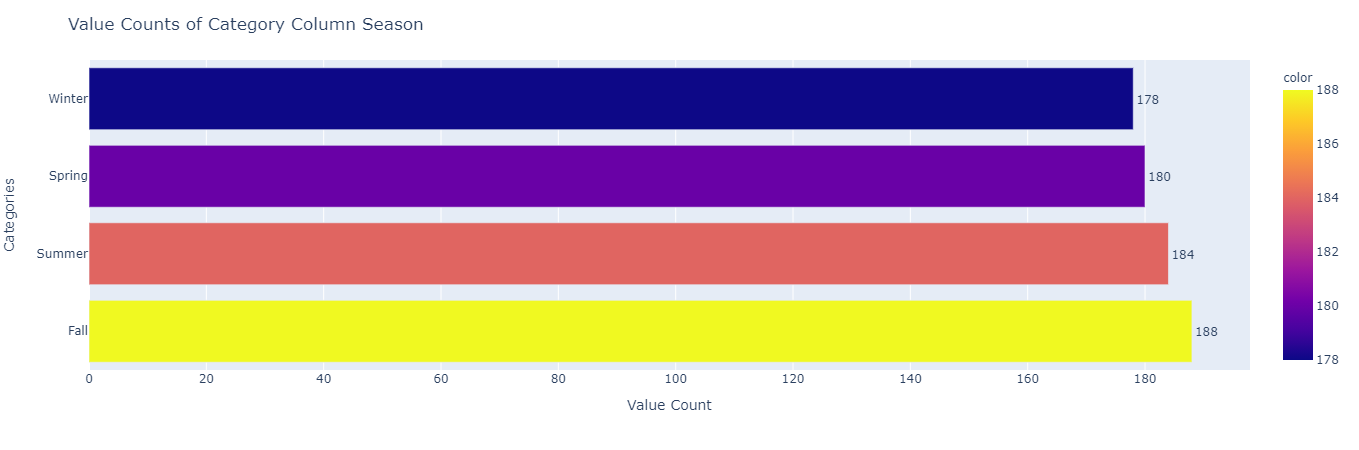

In [18]:
# let's check the Season Column visualization

univ_cat('Season')

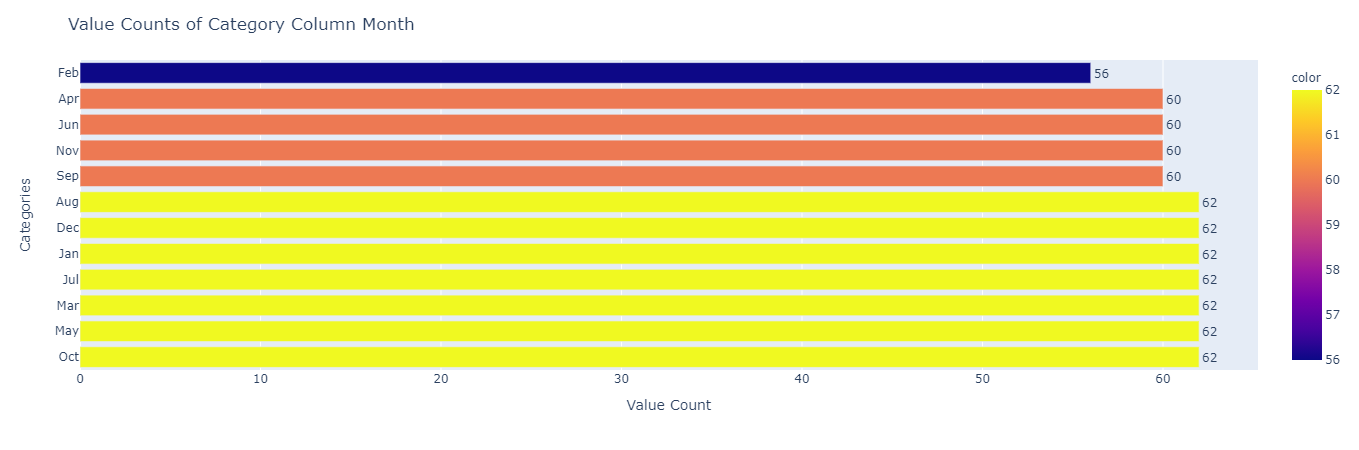

In [19]:
# let's check the Month Column visualization

univ_cat('Month')

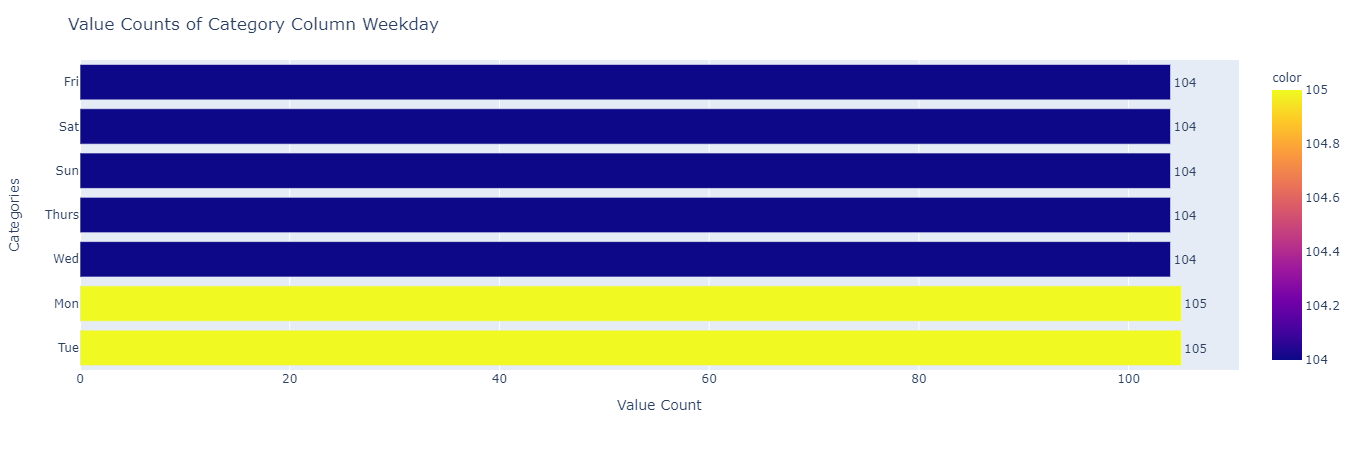

In [20]:
# let's check the Weekday Column visualization

univ_cat('Weekday')

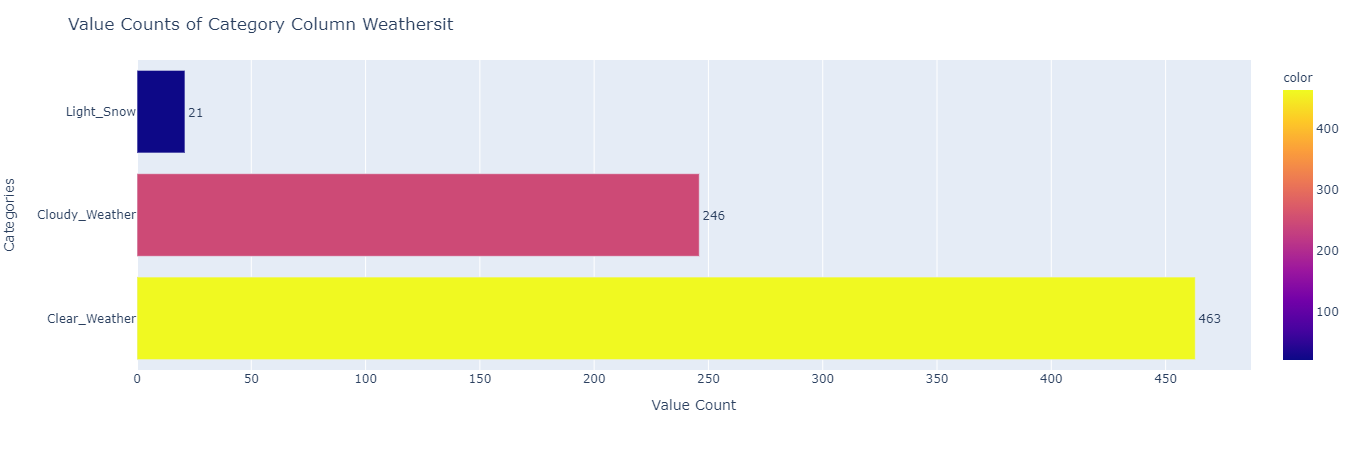

In [21]:
# let's check the Weathersit Column visualization

univ_cat('Weathersit')

<font color = 'Orange'><h2> Inferences: </h2></font>
- From all the above cateogorical visualizations 
    - Fall is having higher value counts among the seasons.
    - Months are almost equally distributed and also the same in the case of Weekdays. 
    - And in the type of weather it's mostly in Cloudy_Weather.

#### 4.1.2. Numerical Data 

In [22]:
# let's define a function to visualize numerical data 

def univ_num(col): 
    
    fig = make_subplots(rows= 1, cols= 2)
    fig.add_trace(go.Box(y= df[col], name= 'Boxplot Distribution of '+ col), row= 1, col= 1)
    fig.add_trace(go.Histogram(x= df[col], name= 'Histogram of '+ col), row= 1, col= 2)
    fig.update_layout(title_text= 'Boxplot and Histogram of '+ col)
    fig.show()

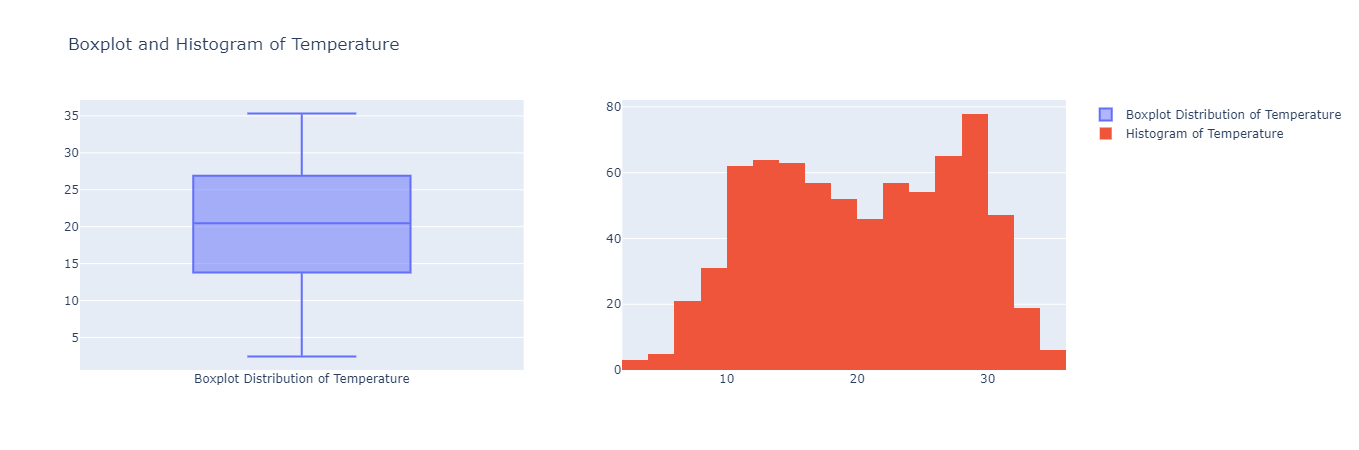

In [23]:
# let's check the Temperature Column visualization

univ_num('Temperature')

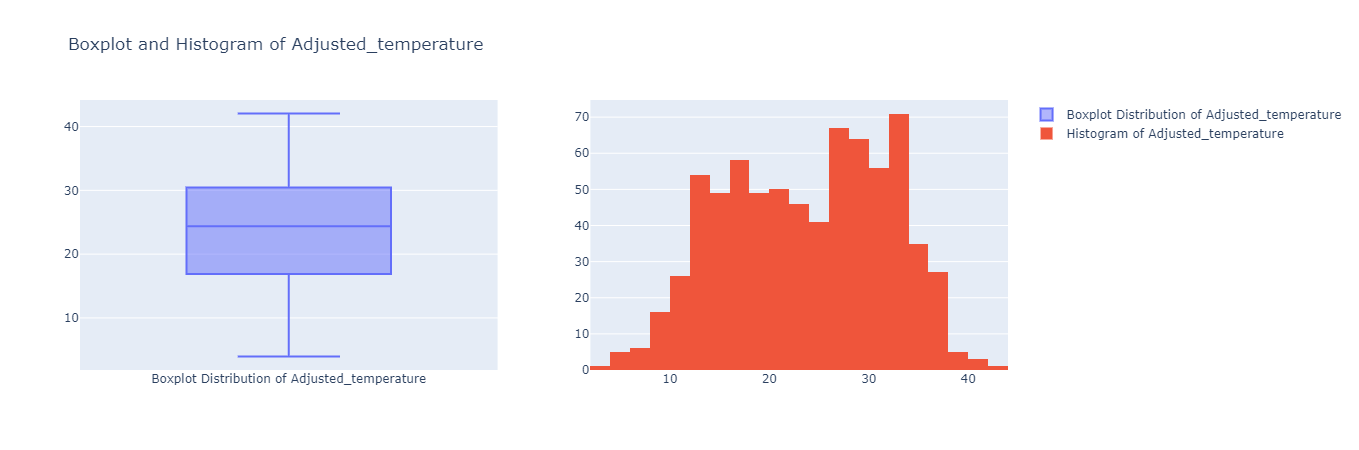

In [24]:
# let's check the Adjusted Temperature Column visualization

univ_num('Adjusted_temperature')

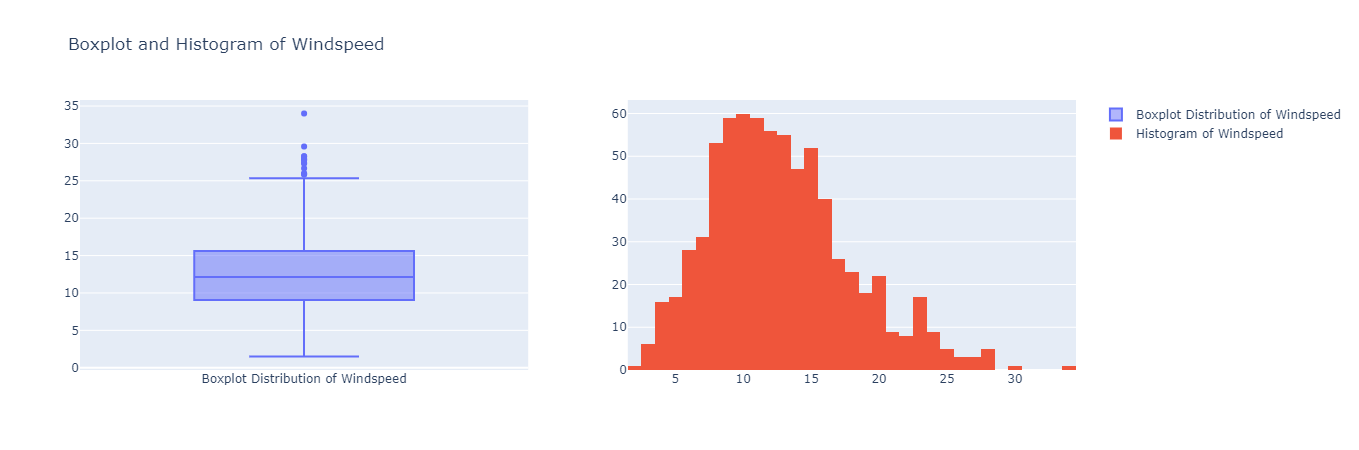

In [25]:
# let's check the Windspeed Column visualization

univ_num('Windspeed')

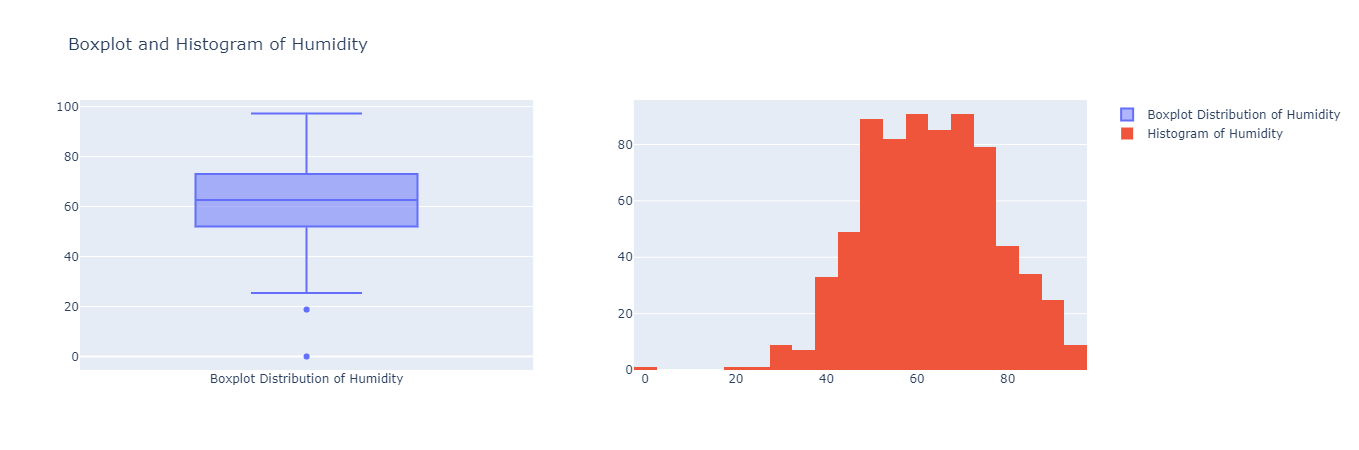

In [26]:
# let's check the Humidity Column visualization

univ_num('Humidity')

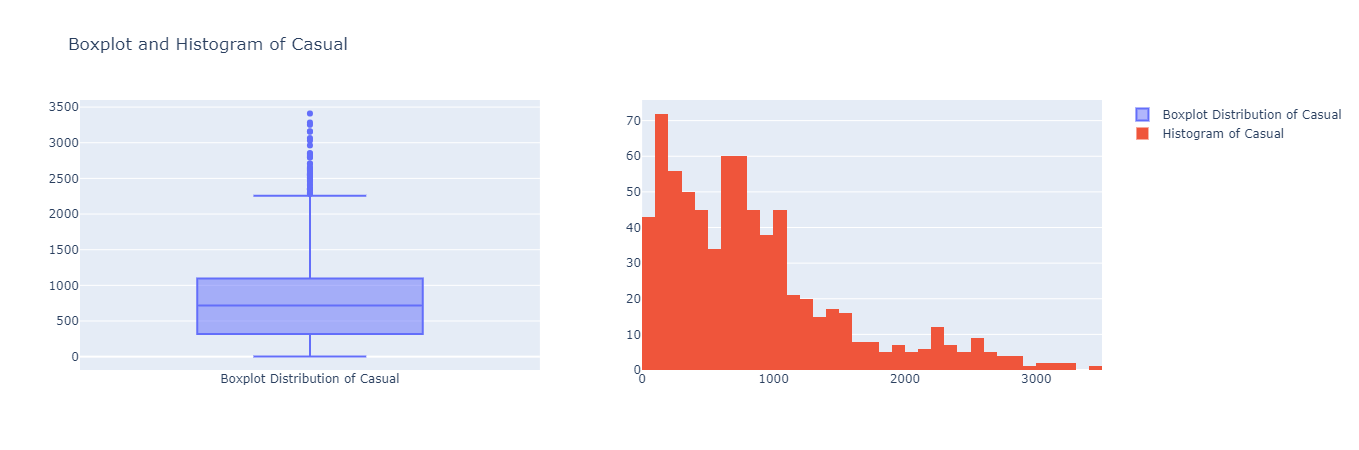

In [27]:
# let's check the Casual Column visualization

univ_num('Casual')

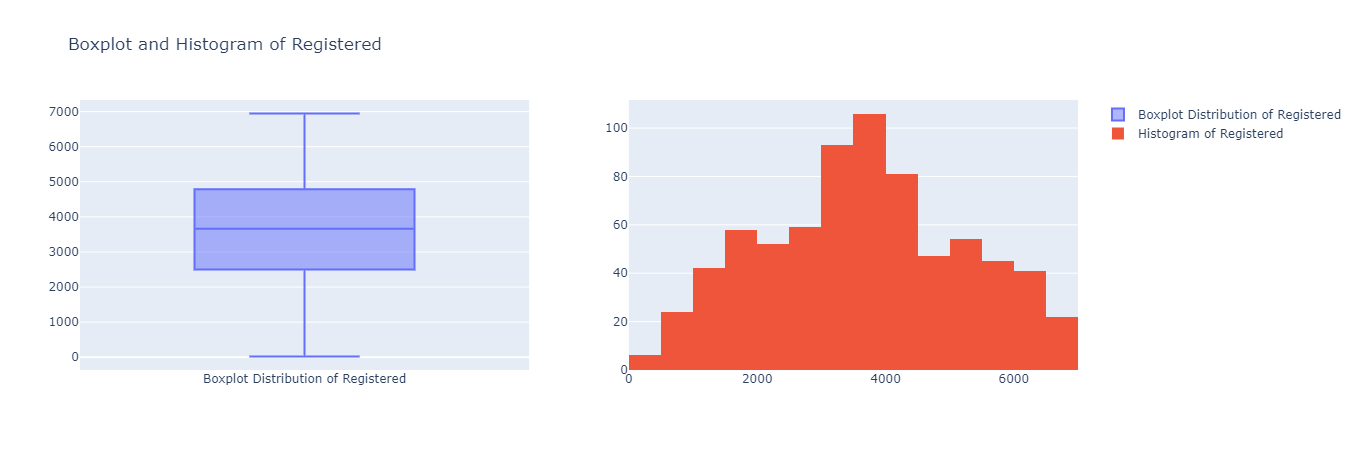

In [28]:
# let's check the Registerd Column visualization

univ_num('Registered')

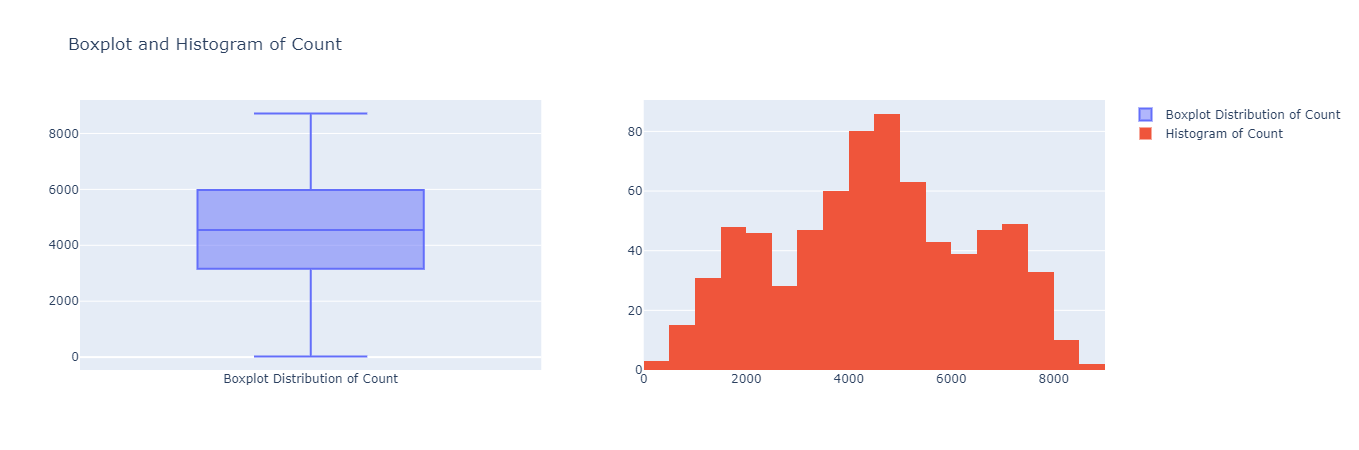

In [29]:
# let's check the Count Column visualization

univ_num('Count')

<font color = 'Orange'><h2> Inferences: </h2></font>

- In the above visualizations 
    - Temperature and Adjusted_temperature are having median approximately 20. 
    - Windspeed having median of 12.1 with some of the outliers. 
    - Humidity having median 62.6.
    - Casual having median of 717 with some outliers.
    - Registered having median 3.6k.
    - Count having median 4.5k.

#### 4.2. Bivariate Analysis

#### 4.2.1. Numerical v/s Categorical

In [30]:
# let's define a function for categorical & Numerical variable 
# here we use count as a numerical variable 

def bivar_num_cat(col): 
    
    fig= px.box(df, x= col, y= 'Count',  title= col+' & Counts')
    fig.show()

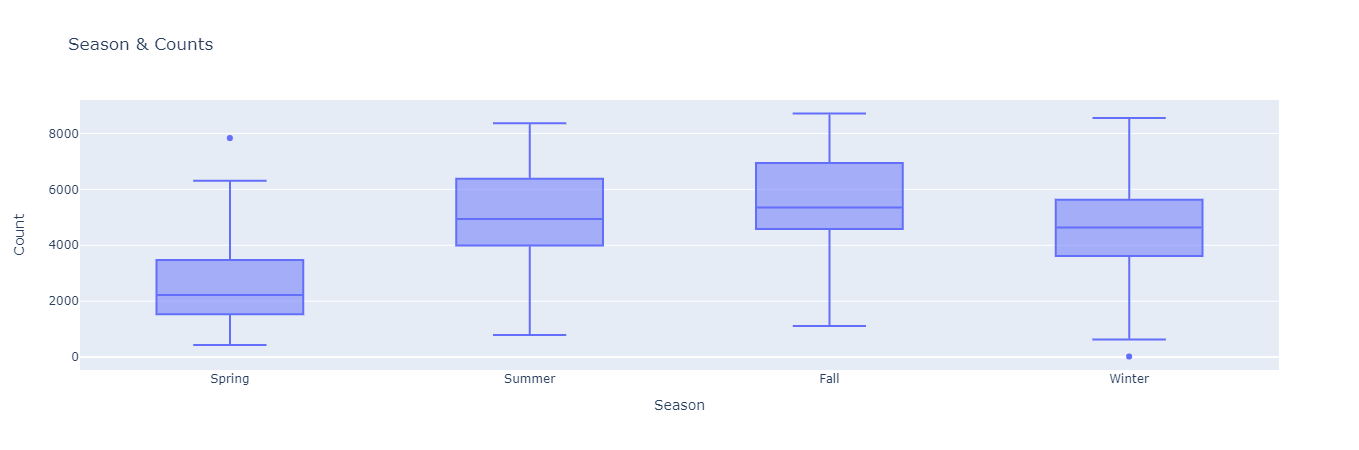

In [31]:
# let's visualize Season w.r.t Count 

bivar_num_cat('Season')

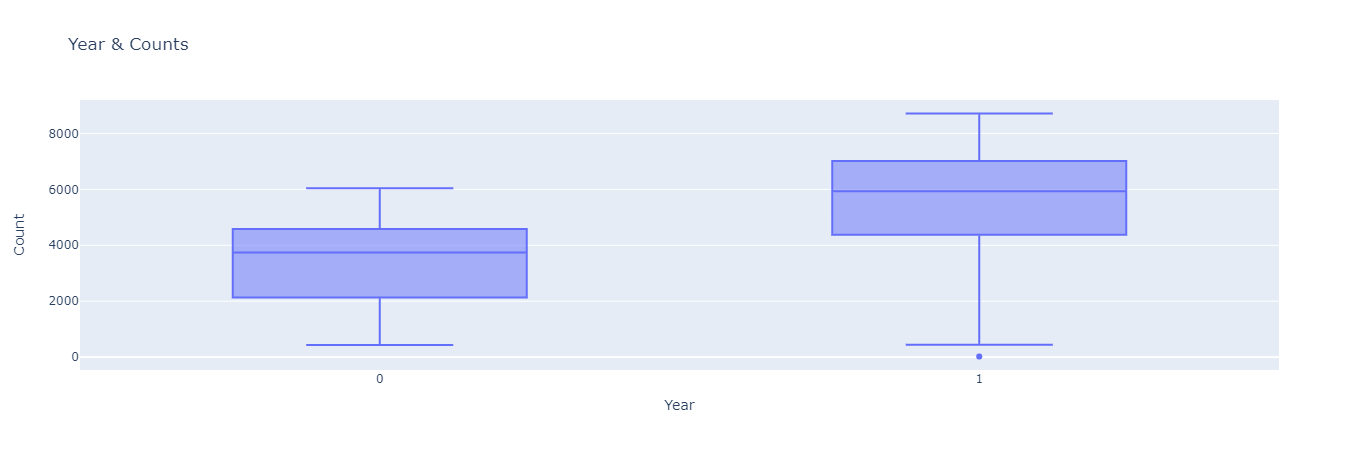

In [32]:
# let's visualize Year w.r.t Count 

bivar_num_cat('Year')

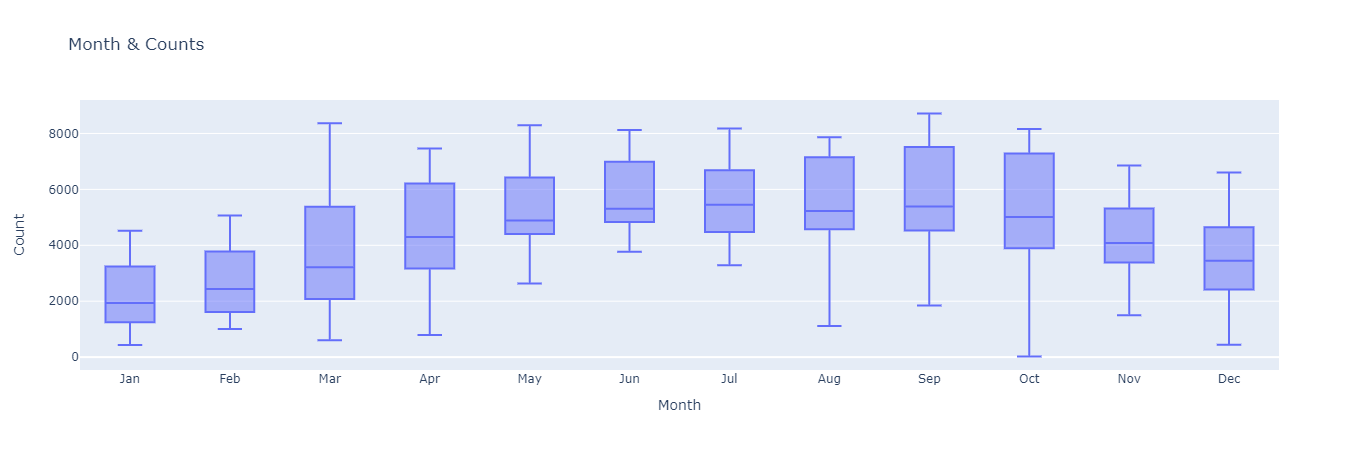

In [33]:
# let's visualize Month w.r.t Count 

bivar_num_cat('Month')

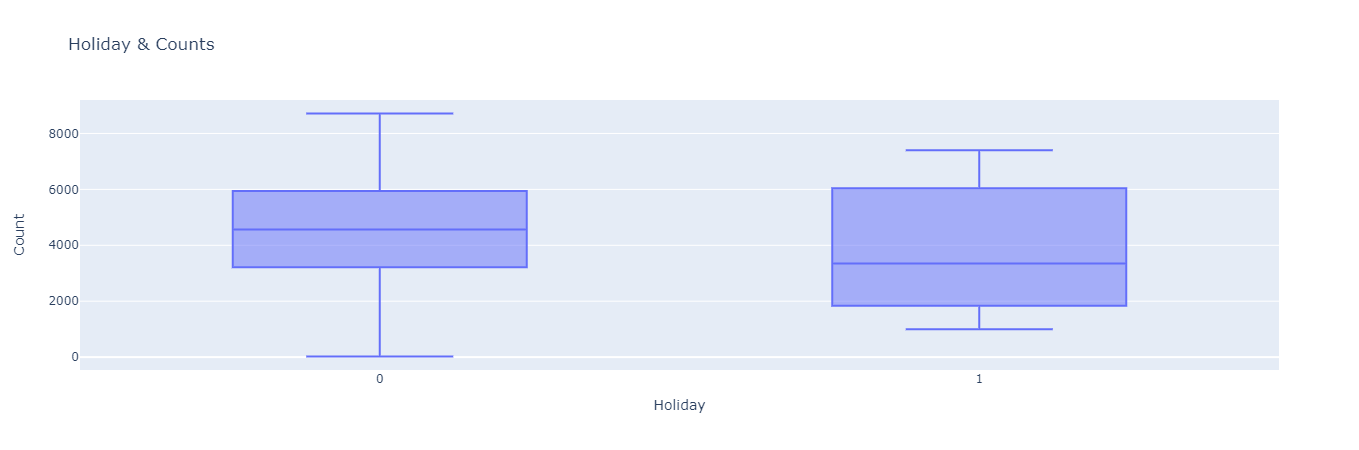

In [34]:
# let's visualize Holiday w.r.t Count 

bivar_num_cat('Holiday')

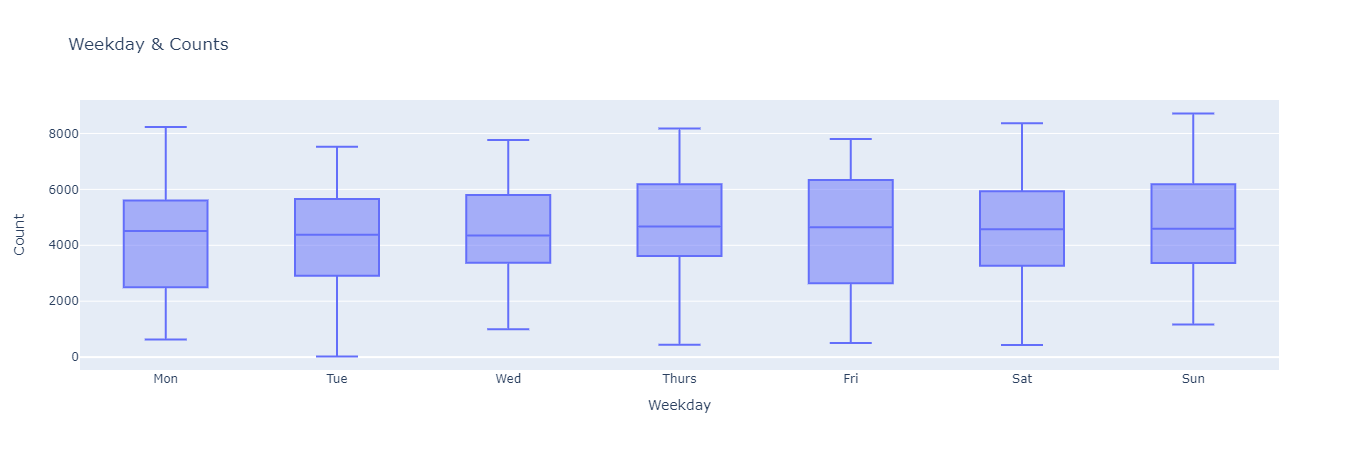

In [35]:
# let's visualize Weekday w.r.t Count 

bivar_num_cat('Weekday')

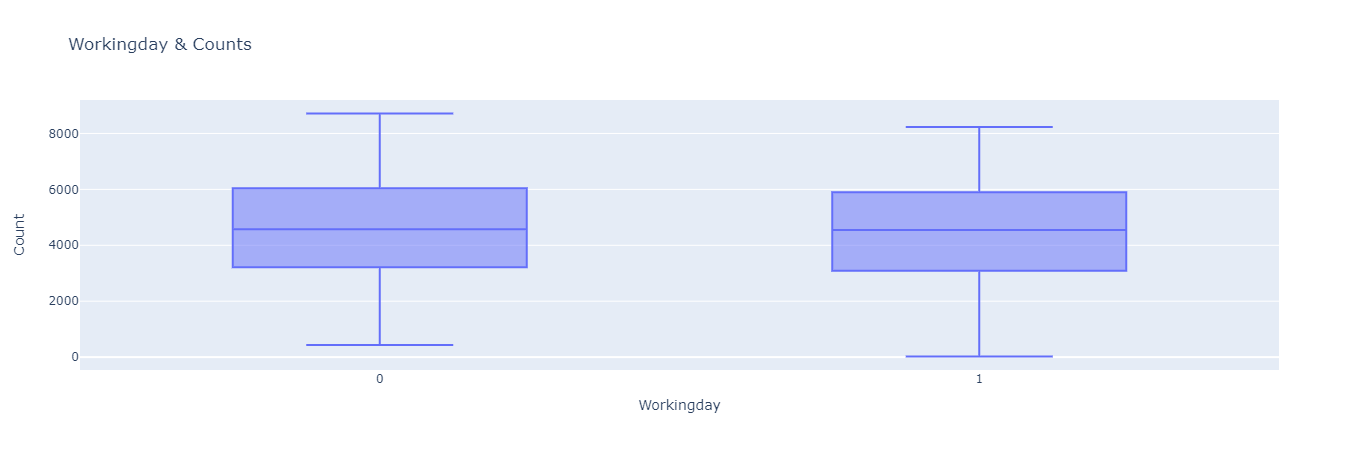

In [36]:
# let's visualize Workingday w.r.t Count 

bivar_num_cat('Workingday')

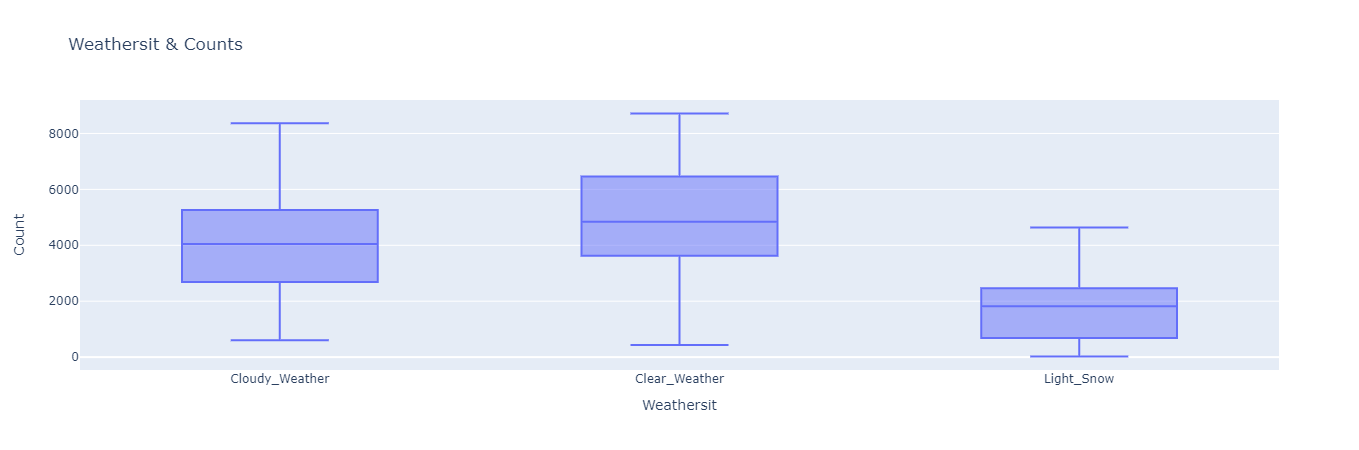

In [37]:
# let's visualize Weathersit w.r.t Count 

bivar_num_cat('Weathersit')

<font color = 'Orange'><h2> Inferences: </h2></font> 
- From the above visualizations 
    - From the boxplot distribution of count w.r.t season, the median of count which is approximately 5.3k is high in Fall season. 
    - It seems to be clear that the count of users is more in the year 2019. 
    - In the month visualization, the count of user is more in the month of July. 
    - In the holiday visualisation, number of users use more in working days rather than a holiday. 
    - All the weekdays are having equal median number of users. 
    - Clear weather is having a greater number of median users and light snow with less median number of users. 

#### 4.2.2. Categorical v/s Categorical w.r.t Count

In [38]:
# let's define a function for categorical & Categorical variable 
# here we use count as a numerical variable 
# let's fix another categorical variable as year

def bivar_cat_cat(col): 
    
    fig= px.box(df, x= col, y= 'Count',color= 'Year', title= col+' & Counts')
    fig.show()

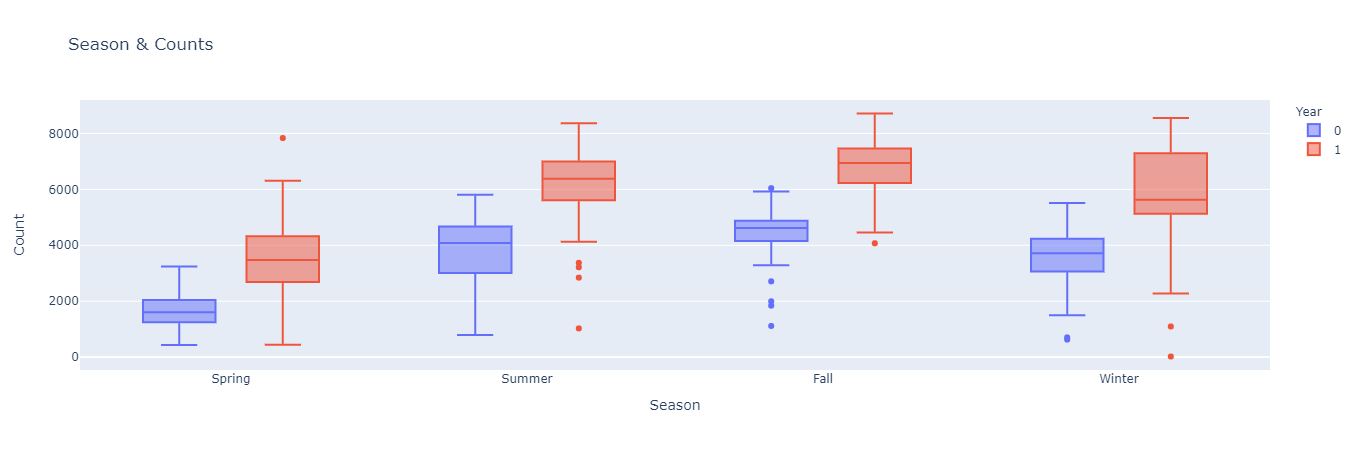

In [39]:
# let's visualize Season w.r.t Count on Year

bivar_cat_cat('Season')

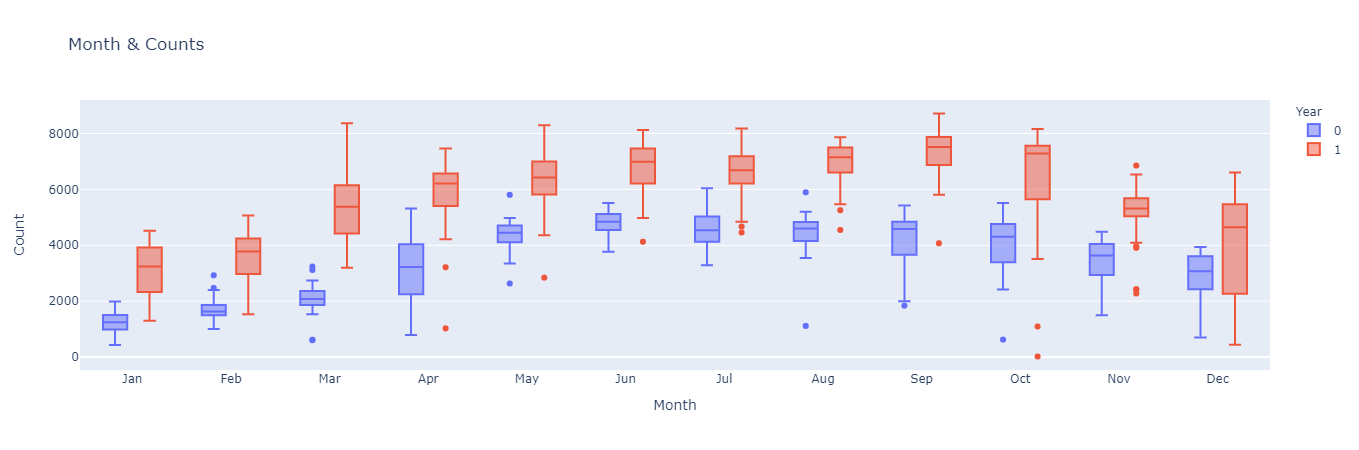

In [40]:
# let's visualize Month w.r.t Count on Year

bivar_cat_cat('Month')

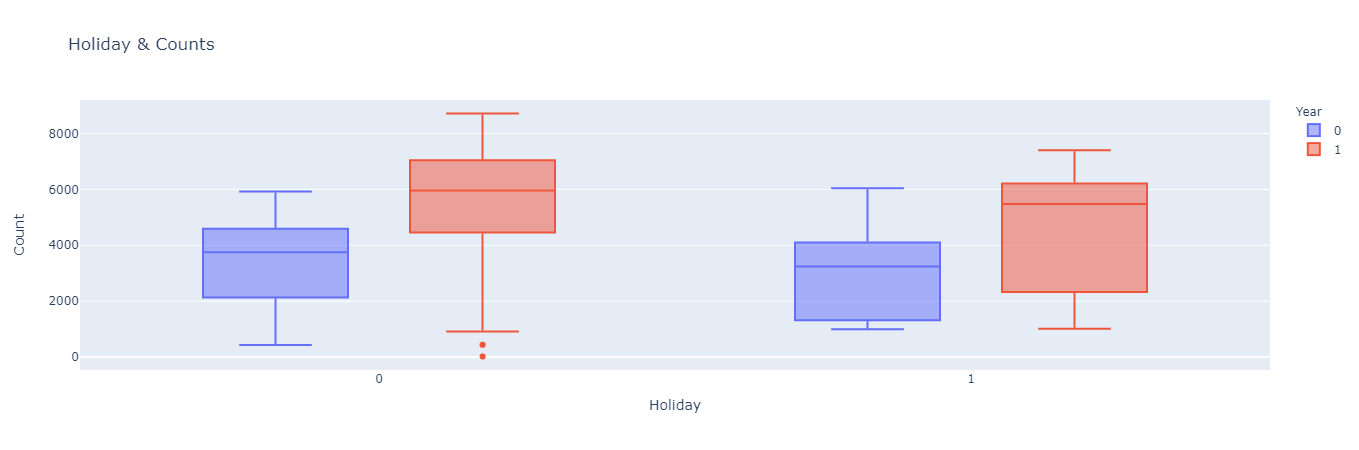

In [41]:
# let's visualize Holiday w.r.t Count on Year

bivar_cat_cat('Holiday')

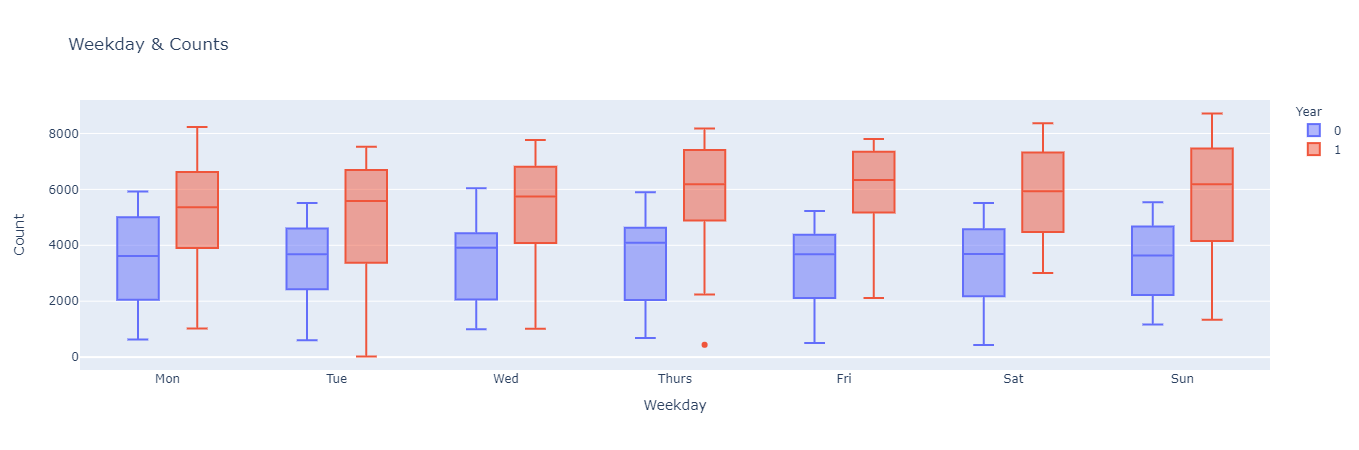

In [42]:
# let's visualize Weekday w.r.t Count on Year

bivar_cat_cat('Weekday')

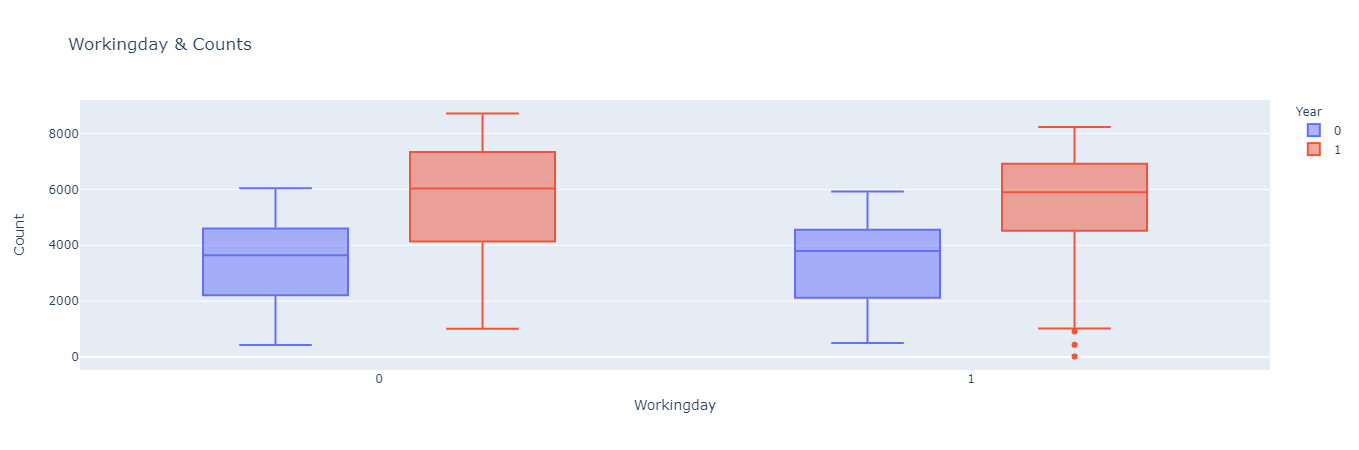

In [43]:
# let's visualize Workingday w.r.t Count on Year

bivar_cat_cat('Workingday')

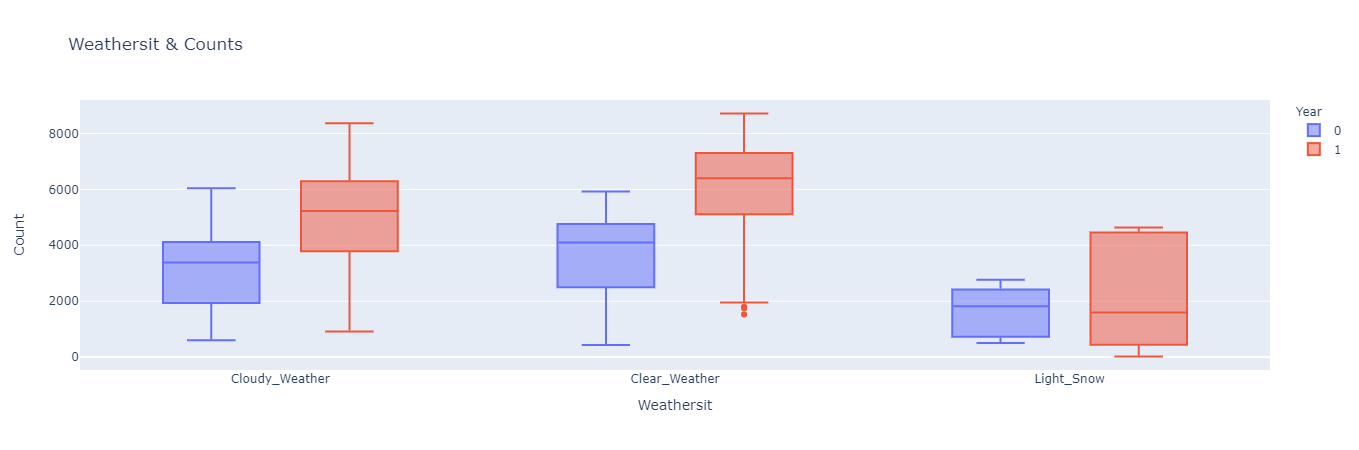

In [44]:
# let's visualize Weathersit w.r.t Count on Year

bivar_cat_cat('Weathersit')

#### 4.2.3. Numerical v/s Numerical

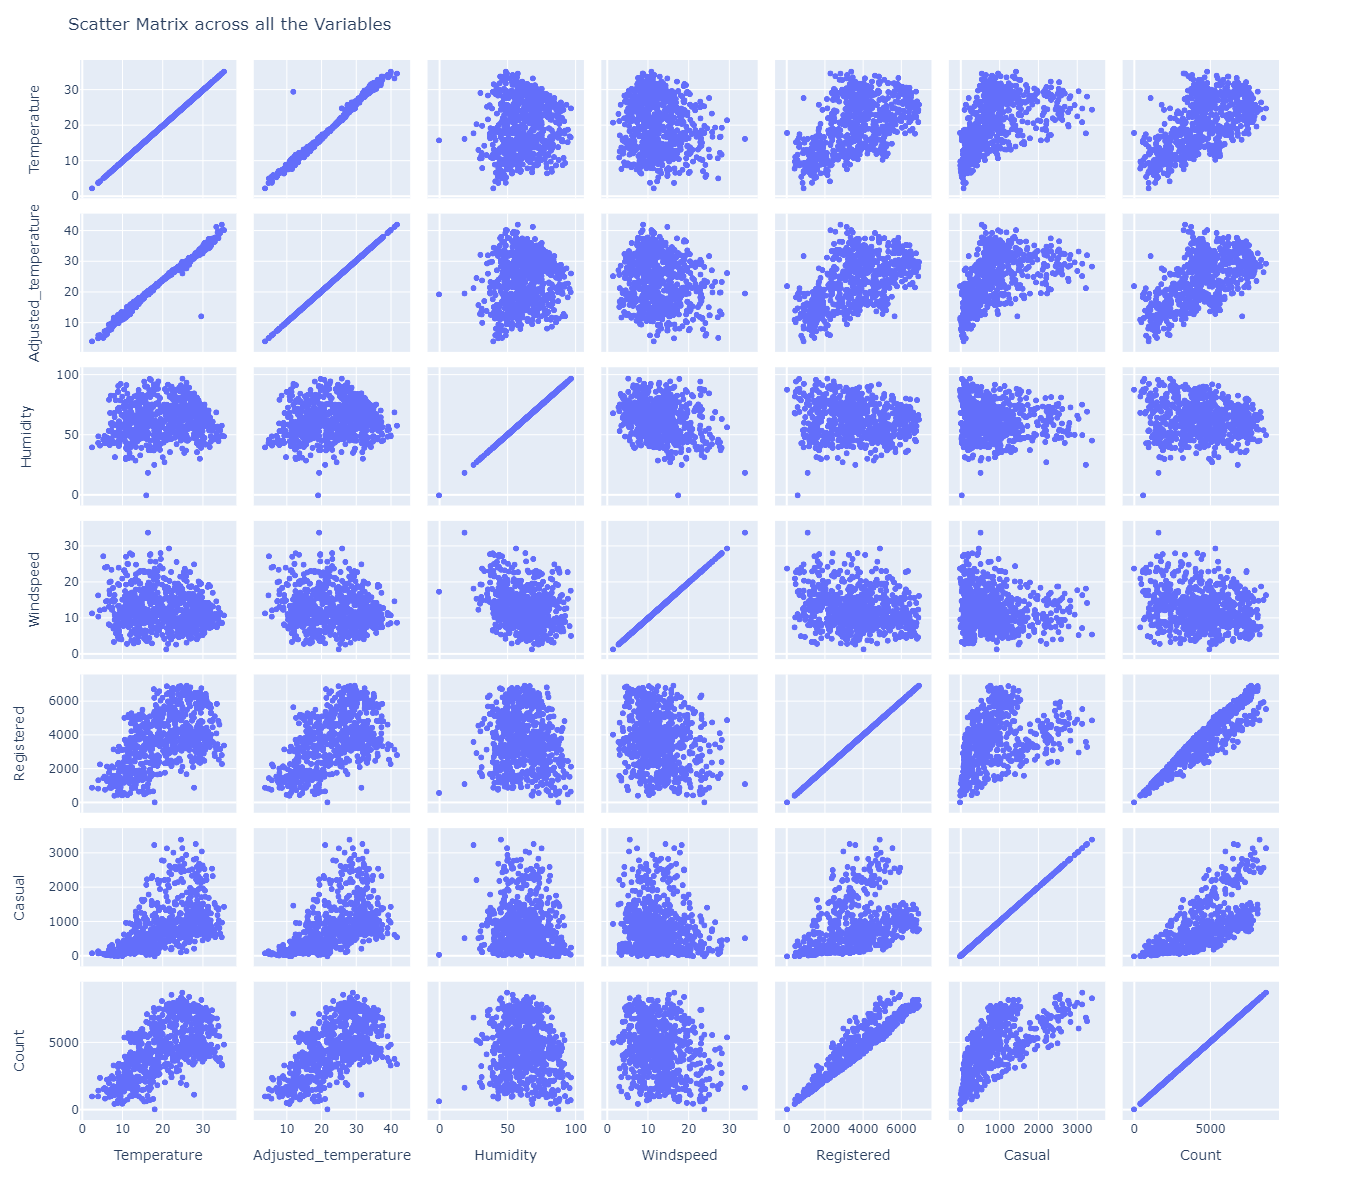

In [45]:
# let's check the Scatter plot distribution of all the numeric variables in the df 

fig= px.scatter_matrix(df[['Temperature','Adjusted_temperature','Humidity','Windspeed','Registered','Casual','Count']])
fig.update_layout(title_text= 'Scatter Matrix across all the Variables', height= 1200)
fig.show()

<font color= 'orange'><h2>Inferences </h2></font> 

- From the scatter plot distributions
    - Temperature and Adjusted_temperature is having higher correlation.
    - W.r.t Count, registered is having more correlation.

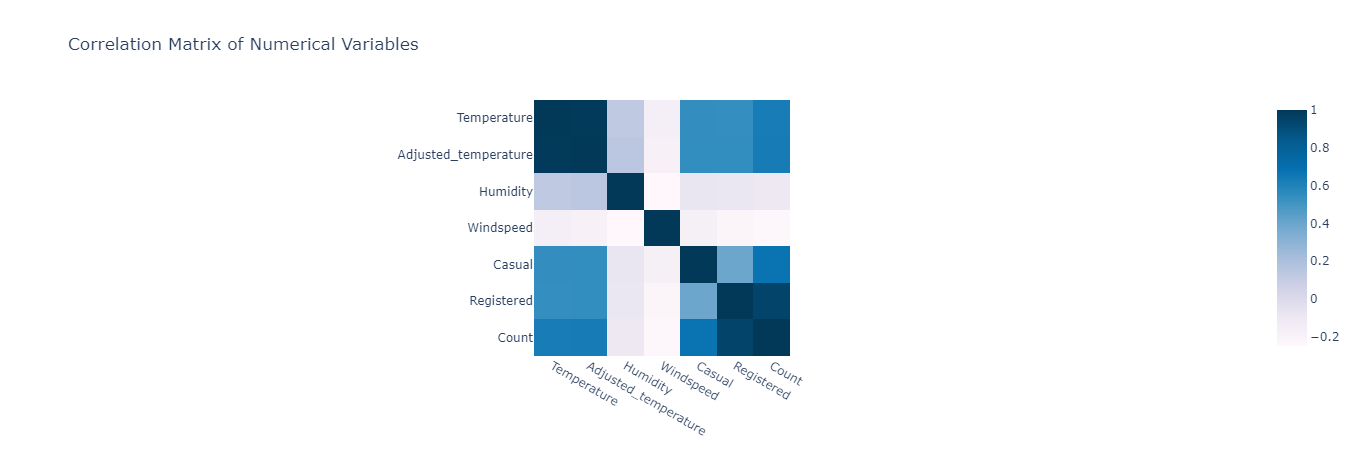

In [46]:
# let's check the correlation matrix for the numerical variables 

fig= px.imshow(df.corr(), color_continuous_scale= 'pubu', title= 'Correlation Matrix of Numerical Variables')
fig.show()

<font color= 'orange'><h2>Inferences </h2></font> 

- As inferred in Scatter plot, Heat map is also saying the same thing
    - Temperature and Adjusted_temperature is having higher correlation.
    - W.r.t Count, registered is having more correlation.

In [47]:
# let's create a new column for verification if there is a relationship b/w Registered, Casual & Count

df['Count_R_C']= df['Casual'] + df['Registered']

In [48]:
df.head()

Season Year Month Holiday Weekday Workingday      Weathersit  Temperature  \
0  Spring    0   Jan       0     Mon          1  Cloudy_Weather    14.110847   
1  Spring    0   Jan       0     Tue          1  Cloudy_Weather    14.902598   
2  Spring    0   Jan       0     Wed          1   Clear_Weather     8.050924   
3  Spring    0   Jan       0   Thurs          1   Clear_Weather     8.200000   
4  Spring    0   Jan       0     Fri          1   Clear_Weather     9.305237   

   Adjusted_temperature  Humidity  Windspeed  Casual  Registered  Count  \
0              18.18125   80.5833  10.749882     331         654    985   
1              17.68695   69.6087  16.652113     131         670    801   
2               9.47025   43.7273  16.636703     120        1229   1349   
3              10.60610   59.0435  10.739832     108        1454   1562   
4              11.46350   43.6957  12.522300      82        1518   1600   

   Count_R_C  
0        985  
1        801  
2       1349  
3       1562  
4       1600

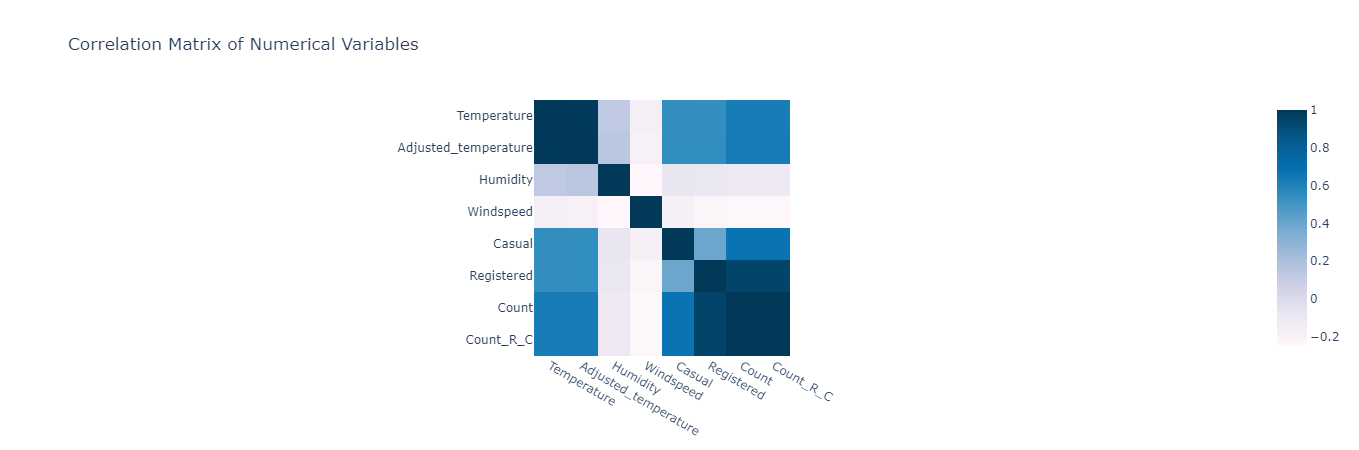

In [49]:
# now let's check the correlation 

fig= px.imshow(df.corr(), color_continuous_scale= 'pubu', title= 'Correlation Matrix of Numerical Variables')
fig.show()

<font color= 'orange'><h2>Inferences </h2></font> 

- As there Count_R_C which is sum of Registered & Casual gives us the count we can drop these two columns. 
- Also the Adjusted_temperature is having the correlation of 0.99 with temperature which is close to 1 we can also drop this column.

In [50]:
# dropping the highly correlated columns

df.drop(columns= ['Adjusted_temperature', 'Casual', 'Registered', 'Count_R_C'], axis= 1, inplace= True)
df.head()

Season Year Month Holiday Weekday Workingday      Weathersit  Temperature  \
0  Spring    0   Jan       0     Mon          1  Cloudy_Weather    14.110847   
1  Spring    0   Jan       0     Tue          1  Cloudy_Weather    14.902598   
2  Spring    0   Jan       0     Wed          1   Clear_Weather     8.050924   
3  Spring    0   Jan       0   Thurs          1   Clear_Weather     8.200000   
4  Spring    0   Jan       0     Fri          1   Clear_Weather     9.305237   

   Humidity  Windspeed  Count  
0   80.5833  10.749882    985  
1   69.6087  16.652113    801  
2   43.7273  16.636703   1349  
3   59.0435  10.739832   1562  
4   43.6957  12.522300   1600

### 5. Data Preparation for Model Building

- Before proceeding with linear model building, we need to prepare the data as per the following steps: 
    - Change the categorical variables using dummies. 
    - Split the data into train and test data. 
    - Scalling the Numerical Variables

#### 5.1. Changing the Categorical Variables

In this step we will be converting the categorical variables to numeric so that we can build the linear model

In [51]:
# let's use get_dummies of pandas to change the categorical variables 

season= pd.get_dummies(df['Season'], drop_first= True)
month= pd.get_dummies(df['Month'], drop_first= True)
weekday= pd.get_dummies(df['Weekday'], drop_first= True)
weathersit= pd.get_dummies(df['Weathersit'], drop_first= True)

In [52]:
# let's check the head of season 

season.head()

Spring  Summer  Winter
0       1       0       0
1       1       0       0
2       1       0       0
3       1       0       0
4       1       0       0

In [53]:
# let's check the month of season 

month.head()

Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep
0    0    0    0    1    0    0    0    0    0    0    0
1    0    0    0    1    0    0    0    0    0    0    0
2    0    0    0    1    0    0    0    0    0    0    0
3    0    0    0    1    0    0    0    0    0    0    0
4    0    0    0    1    0    0    0    0    0    0    0

In [54]:
# let's check the weekday of season 

weekday.head()

Mon  Sat  Sun  Thurs  Tue  Wed
0    1    0    0      0    0    0
1    0    0    0      0    1    0
2    0    0    0      0    0    1
3    0    0    0      1    0    0
4    0    0    0      0    0    0

In [55]:
# let's check the weathersit of season 

weathersit.head()

Cloudy_Weather  Light_Snow
0               1           0
1               1           0
2               0           0
3               0           0
4               0           0

In [56]:
# concatinating the all the dataframes to a single dataframe 

df= pd.concat([df, season, month, weekday, weathersit], axis= 1)

In [57]:
# checking the head of df 

df.head()

Season Year Month Holiday Weekday Workingday      Weathersit  Temperature  \
0  Spring    0   Jan       0     Mon          1  Cloudy_Weather    14.110847   
1  Spring    0   Jan       0     Tue          1  Cloudy_Weather    14.902598   
2  Spring    0   Jan       0     Wed          1   Clear_Weather     8.050924   
3  Spring    0   Jan       0   Thurs          1   Clear_Weather     8.200000   
4  Spring    0   Jan       0     Fri          1   Clear_Weather     9.305237   

   Humidity  Windspeed  ...  Oct  Sep  Mon  Sat  Sun  Thurs  Tue  Wed  \
0   80.5833  10.749882  ...    0    0    1    0    0      0    0    0   
1   69.6087  16.652113  ...    0    0    0    0    0      0    1    0   
2   43.7273  16.636703  ...    0    0    0    0    0      0    0    1   
3   59.0435  10.739832  ...    0    0    0    0    0      1    0    0   
4   43.6957  12.522300  ...    0    0    0    0    0      0    0    0   

   Cloudy_Weather  Light_Snow  
0               1           0  
1               1           0  
2               0           0  
3               0           0  
4               0           0  

[5 rows x 33 columns]

In [58]:
# as the categorical variables are converted using dummies we can drop these  variables 

df.drop(columns= ['Season', 'Month', 'Weekday', 'Weathersit'], axis= 1, inplace= True)

df.head()

Year Holiday Workingday  Temperature  Humidity  Windspeed  Count  Spring  \
0    0       0          1    14.110847   80.5833  10.749882    985       1   
1    0       0          1    14.902598   69.6087  16.652113    801       1   
2    0       0          1     8.050924   43.7273  16.636703   1349       1   
3    0       0          1     8.200000   59.0435  10.739832   1562       1   
4    0       0          1     9.305237   43.6957  12.522300   1600       1   

   Summer  Winter  ...  Oct  Sep  Mon  Sat  Sun  Thurs  Tue  Wed  \
0       0       0  ...    0    0    1    0    0      0    0    0   
1       0       0  ...    0    0    0    0    0      0    1    0   
2       0       0  ...    0    0    0    0    0      0    0    1   
3       0       0  ...    0    0    0    0    0      1    0    0   
4       0       0  ...    0    0    0    0    0      0    0    0   

   Cloudy_Weather  Light_Snow  
0               1           0  
1               1           0  
2               0           0  
3               0           0  
4               0           0  

[5 rows x 29 columns]

#### 5.4. Splitting the Data into Train & Test Datasets 

In this step we will be splitting the data into train & test 
- Train, where the model uses this dataset for the reference to build the coefficients. 
- Test, check the predicted values on this dataset

In [59]:
# splitting the data using train_test_split 

np.random.seed(0)
df_train, df_test= train_test_split(df, train_size= 0.7, random_state= 100)

In [60]:
# let's check the shapes of train & test dataset

print('Train Dataset Size: '+ str(df_train.shape), end= '\n\n\n')
print('Test Dataset Size: '+ str(df_test.shape))

Train Dataset Size: (510, 29)


Test Dataset Size: (220, 29)


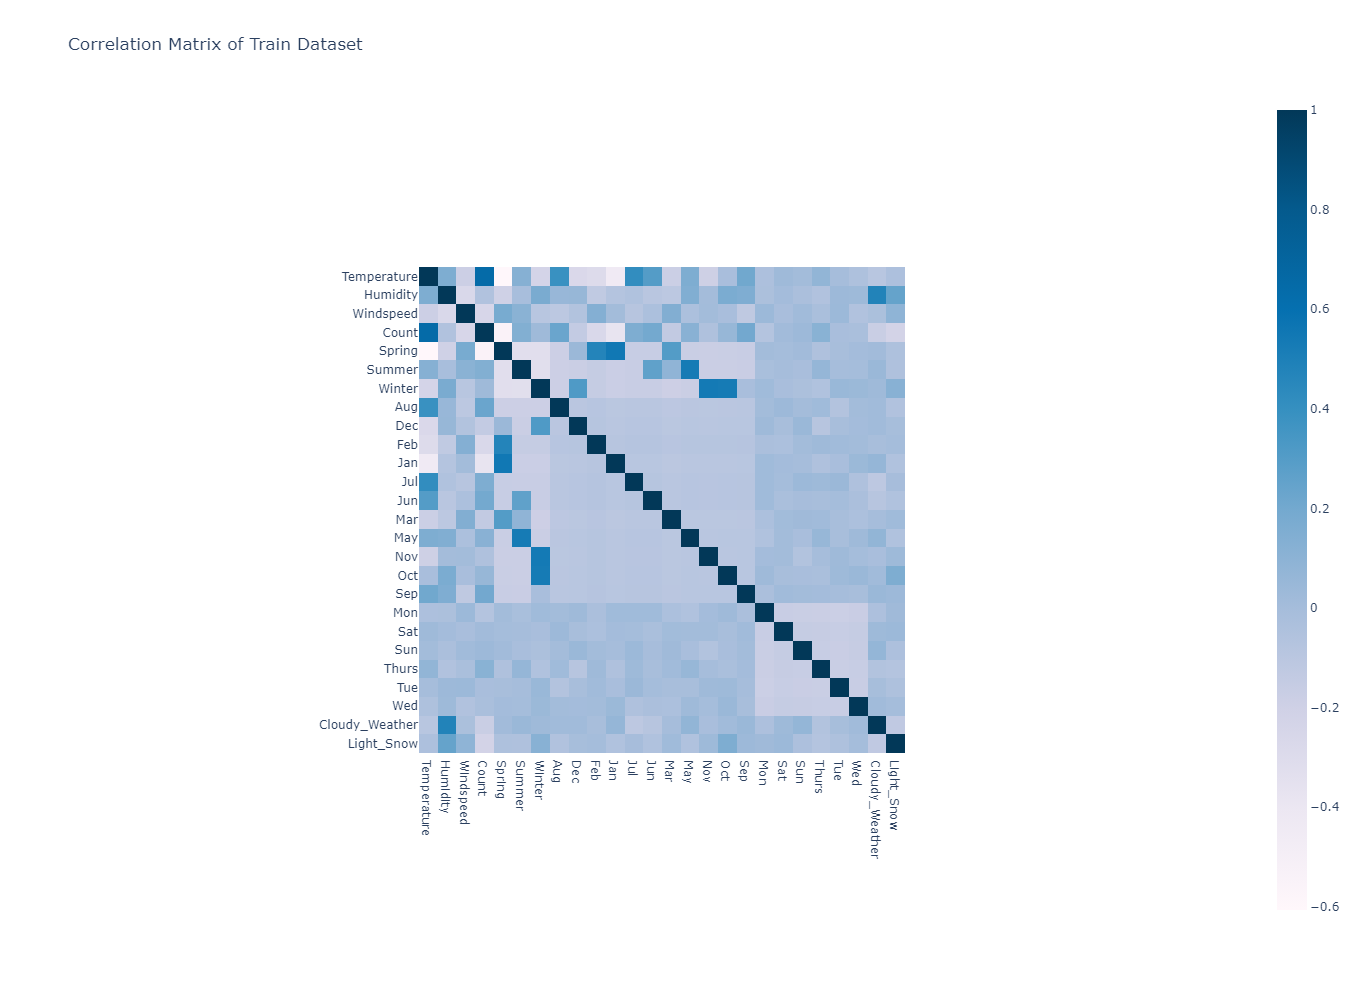

In [61]:
# let's check the correlation of train dataset 

fig= px.imshow(df_train.corr(),color_continuous_scale= 'pubu', title= 'Correlation Matrix of Train Dataset')
fig.update_layout(height= 1000)
fig.show()

#### 5.3. Scaling the Numeric Variables 

In this step to make sure all the numeric variables are in same scale we will be using MinMax Scalar to work with.

In [62]:
# defining the numerical variables for scaling
num_var= ['Temperature', 'Humidity', 'Windspeed', 'Count']

# calling the MinMax Scalar
scalar= MinMaxScaler()

# fitting and transforming the scaled data to train dataset
df_train[num_var]= scalar.fit_transform(df_train[num_var])

In [63]:
# let's check if the values of df_train are scaled or not 

df_train[num_var].describe()

Temperature    Humidity   Windspeed       Count
count   510.000000  510.000000  510.000000  510.000000
mean      0.537440    0.650480    0.320883    0.513499
std       0.225858    0.145846    0.169803    0.224421
min       0.000000    0.000000    0.000000    0.000000
25%       0.339853    0.538643    0.199179    0.356420
50%       0.542596    0.653714    0.296763    0.518638
75%       0.735215    0.754830    0.414447    0.684710
max       1.000000    1.000000    1.000000    1.000000

### 6. Building Linear Model

- In this step we will performing the following steps: 
    - With the use of Recursive Feature Elimination (RFE) we will taking 15 most siginificant variables for model building. 
    - Building the model using statsmodel and checking the significance level.
    - Checking the Variance Inflation Factor (VIF) to check the multicolinearity among the variables.
    - Dropping the variables which are highly insignificant, high VIF. 
    
Steps 2, 3 & 4 are repeated untill the variables are highly significant and least multicolinear.

#### 6.1. Defing the Objects

In [64]:
# defing the objects 
# y_train --> dependent variable --> Target Count in our case
# X_train --> independent variables --> All other columns 

y_train= df_train.pop('Count')
X_train= df_train

In [65]:
# y_train head values 

y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: Count, dtype: float64

In [66]:
# X_train head values 

X_train.head()

Year Holiday Workingday  Temperature  Humidity  Windspeed  Spring  Summer  \
576    1       0          1     0.815169  0.725633   0.264686       0       0   
426    1       0          0     0.442393  0.640189   0.255342       1       0   
728    1       0          1     0.245101  0.498067   0.663106       1       0   
482    1       0          0     0.395666  0.504508   0.188475       0       1   
111    0       0          0     0.345824  0.751824   0.380981       0       1   

     Winter  Aug  ...  Oct  Sep  Mon  Sat  Sun  Thurs  Tue  Wed  \
576       0    0  ...    0    0    0    0    0      0    0    1   
426       0    0  ...    0    0    0    0    1      0    0    0   
728       0    0  ...    0    0    1    0    0      0    0    0   
482       0    0  ...    0    0    0    0    1      0    0    0   
111       0    0  ...    0    0    0    0    1      0    0    0   

     Cloudy_Weather  Light_Snow  
576               0           0  
426               1           0  
728               0           0  
482               1           0  
111               1           0  

[5 rows x 28 columns]

#### 6.2. Feature Selection Using RFE

In [67]:
# building a linear regression model for the RFE to select features

lm= LinearRegression()
lm.fit(X_train, y_train)

# passing the build model to RFE to select 15 significant features
rfe= RFE(lm, 15)
rfe= rfe.fit(X_train, y_train)

In [68]:
# checking the columns and their rankings that have been selected

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Year', True, 1),
 ('Holiday', True, 1),
 ('Workingday', False, 3),
 ('Temperature', True, 1),
 ('Humidity', True, 1),
 ('Windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 11),
 ('Mar', False, 14),
 ('May', False, 8),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 7),
 ('Sat', False, 4),
 ('Sun', False, 5),
 ('Thurs', False, 13),
 ('Tue', False, 6),
 ('Wed', False, 10),
 ('Cloudy_Weather', True, 1),
 ('Light_Snow', True, 1)]

In [69]:
# checking the columns required for model  building 

col= X_train.columns[rfe.support_]
col

Index(['Year', 'Holiday', 'Temperature', 'Humidity', 'Windspeed', 'Spring',
       'Summer', 'Winter', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep', 'Cloudy_Weather',
       'Light_Snow'],
      dtype='object')

#### 6.4. Model Building & VIF Check

In [70]:
# let's define a function for the model building 

def model_building(y_train, X_train): 
    
    X_train_sm= sm.add_constant(X_train)
    lm= sm.OLS(y_train, X_train_sm)
    lm= lm.fit()
    
    return lm 

In [71]:
# defing a function to check the VIF 

def check_vif(X): 
    
    vif= pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    
    return vif

In [72]:
# let's build the 1st model with selecting columns returned by RFE 

X_train_lm1= X_train[col]

lm1= model_building(y_train, X_train_lm1)

print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          8.15e-189
Time:                        14:01:29   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3197      0.036      8.

In [73]:
# let's check the VIF for the variables used in lm1 

check_vif(X_train_lm1)

Features    VIF
3         Humidity  30.89
2      Temperature  17.79
4        Windspeed   4.72
5           Spring   4.37
7           Winter   4.06
6           Summer   2.82
13  Cloudy_Weather   2.32
0             Year   2.09
11             Nov   1.85
9              Jan   1.75
10             Jul   1.59
8              Dec   1.56
12             Sep   1.41
14      Light_Snow   1.28
1          Holiday   1.06

Eventhough the $R^2$ & Adjusted $R^2$ is having a good values of 84.5% & 84% there are some variables which are insignificant and also there high multicolinearity. 

- Dec having p_value 0.043 which is close to 0.05 which is making insignificant 
- Humidity having very high VIF which is highly colinear with other variables 

Let's drop Dec and check the model 

In [74]:
# dropping 'Dec' and checking the model accuracy 

X_train_lm2= X_train_lm1.drop(columns= ['Dec'], axis= 1)

lm2= model_building(y_train, X_train_lm2)
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.8
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          4.41e-189
Time:                        14:01:29   Log-Likelihood:                 512.08
No. Observations:                 510   AIC:                            -994.2
Df Residuals:                     495   BIC:                            -930.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3032      0.035      8.

In [75]:
# checking VIF for the lm2 

check_vif(X_train_lm2)

Features    VIF
3         Humidity  29.09
2      Temperature  16.80
4        Windspeed   4.72
5           Spring   4.37
7           Winter   3.78
6           Summer   2.80
12  Cloudy_Weather   2.29
0             Year   2.09
8              Jan   1.67
10             Nov   1.60
9              Jul   1.59
11             Sep   1.40
13      Light_Snow   1.25
1          Holiday   1.06

Since after dropping the Dec column there are more columns with highly insignificant and having hig multicolinearity, eventhough having good $R^2$ and Adjusted $R^2$.
- Nov having p_value 0.174 which is highly insignificant. 
- Humiditiy is still highly colinear with other variables.

Let's drop Nov and build the model.

In [76]:
# dropping 'Nov' and checking accuracy 

X_train_lm3= X_train_lm2.drop(columns= ['Nov'], axis= 1)

lm3= model_building(y_train, X_train_lm3)

print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          7.59e-190
Time:                        14:01:29   Log-Likelihood:                 511.13
No. Observations:                 510   AIC:                            -994.3
Df Residuals:                     496   BIC:                            -935.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2964      0.035      8.

In [77]:
# checking VIF for the lm3

check_vif(X_train_lm3)

Features    VIF
3         Humidity  29.02
2      Temperature  16.71
4        Windspeed   4.66
5           Spring   4.34
7           Winter   3.36
6           Summer   2.79
11  Cloudy_Weather   2.29
0             Year   2.09
8              Jan   1.67
9              Jul   1.59
10             Sep   1.38
12      Light_Snow   1.24
1          Holiday   1.04

Since after dropping the Nov column there are more columns with highly insignificant and having hig multicolinearity, eventhough having good $R^2$ and Adjusted $R^2$.
- Jan having p_value 0.059 which is insignificant. 
- Humiditiy is still highly colinear with other variables.

Let's drop Jan and build the model.

In [78]:
# dropping 'Jan' and checking accuracy 

X_train_lm4= X_train_lm3.drop(columns= ['Jan'], axis= 1)

lm4= model_building(y_train, X_train_lm4)

print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          2.95e-190
Time:                        14:01:29   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2848      0.034      8.

In [79]:
# checking VIF for the lm4

check_vif(X_train_lm4)

Features    VIF
3         Humidity  28.03
2      Temperature  16.03
4        Windspeed   4.65
5           Spring   4.01
7           Winter   3.33
6           Summer   2.79
10  Cloudy_Weather   2.28
0             Year   2.08
8              Jul   1.58
9              Sep   1.38
11      Light_Snow   1.24
1          Holiday   1.04

After dropping the Jan Column we could see that all the columns are significant but Humidity is still colinear with other variables. 

Let's drop Humidity and build the model

In [80]:
# dropping 'Humidity' and checking accuracy 

X_train_lm5= X_train_lm4.drop(columns= ['Humidity'], axis= 1)

lm5= model_building(y_train, X_train_lm5)

print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          5.06e-187
Time:                        14:01:29   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1994      0.030      6.

In [81]:
# checking VIF for the lm5

check_vif(X_train_lm5)

Features   VIF
2      Temperature  5.09
3        Windspeed  4.60
5           Summer  2.23
4           Spring  2.08
0             Year  2.07
6           Winter  1.78
7              Jul  1.58
9   Cloudy_Weather  1.55
8              Sep  1.34
10      Light_Snow  1.08
1          Holiday  1.04

Now even after dropping the Humidity, Temperature is still having the colinearity with other variables. 

Let's drop Temperature and build the model. 

In [82]:
# dropping 'Temperature' and checking accuracy 

X_train_lm6= X_train_lm5.drop(columns= ['Temperature'], axis= 1)

lm6= model_building(y_train, X_train_lm6)

print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     160.8
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          5.02e-149
Time:                        14:01:30   Log-Likelihood:                 406.16
No. Observations:                 510   AIC:                            -790.3
Df Residuals:                     499   BIC:                            -743.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5837      0.017     34.

In [83]:
# checking VIF for the lm6

check_vif(X_train_lm6)

Features   VIF
2       Windspeed  3.81
3          Spring  2.07
4          Summer  2.01
0            Year  1.83
5          Winter  1.73
8  Cloudy_Weather  1.52
6             Jul  1.19
7             Sep  1.16
9      Light_Snow  1.08
1         Holiday  1.04

After dropping temperature there are some variables which became highly insgnificant but there is no multi colinearity. 

Let's drop Jul and build the model.

In [84]:
# dropping 'Jul' and checking accuracy 

X_train_lm7= X_train_lm6.drop(columns= ['Jul'], axis= 1)

lm7= model_building(y_train, X_train_lm7)

print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     178.8
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          4.30e-150
Time:                        14:01:30   Log-Likelihood:                 405.99
No. Observations:                 510   AIC:                            -792.0
Df Residuals:                     500   BIC:                            -749.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5790      0.015     39.

In [85]:
# checking VIF for the lm7

check_vif(X_train_lm7)

Features   VIF
2       Windspeed  3.46
3          Spring  1.91
4          Summer  1.86
0            Year  1.77
5          Winter  1.63
7  Cloudy_Weather  1.51
6             Sep  1.14
8      Light_Snow  1.08
1         Holiday  1.04

<font color= 'orange'><h2>Inferences </h2></font> 

From this we could conclude that the Independent Variables are having significant relationship and Features are not having any multicolinearity.

Let's perform the residual analysis if the model is meeting the assumptions used in Linear Regression.

#### 6.5. Residual Analysis

In [86]:
# let's predict the output using predict

X_train_lm_final= sm.add_constant(X_train_lm7)
y_train_pred= lm7.predict(X_train_lm_final)

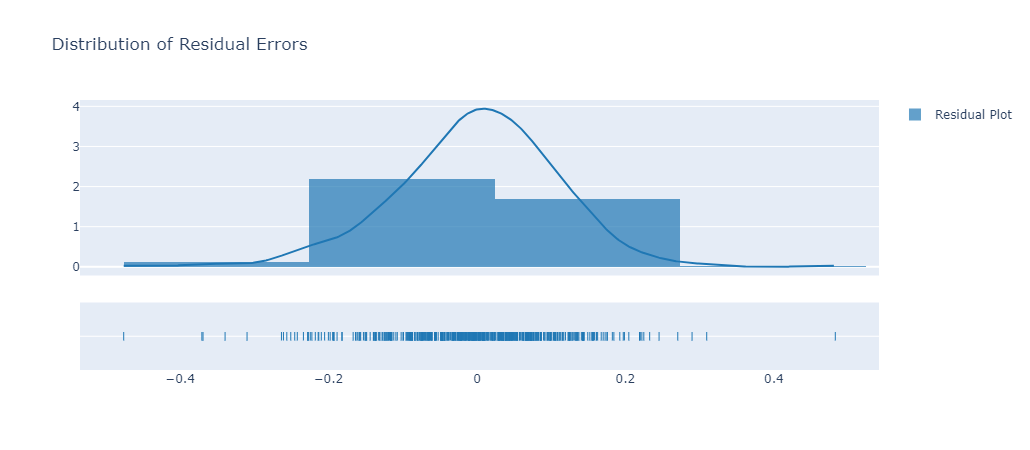

In [87]:
# let's plot the distribution of residual errors 
# residual error is given by actual value - predicted value

fig= ff.create_distplot([(y_train - y_train_pred)], ['Residual Plot'], bin_size=0.25)
fig.update_layout(title_text= 'Distribution of Residual Errors')
fig.show()

- The normal distribution of the residual terms is a very crucial assumption when it comes to making
inferences from a linear regression model. Hence, it is very important that we need to analyse these residual
terms before you can move forward.

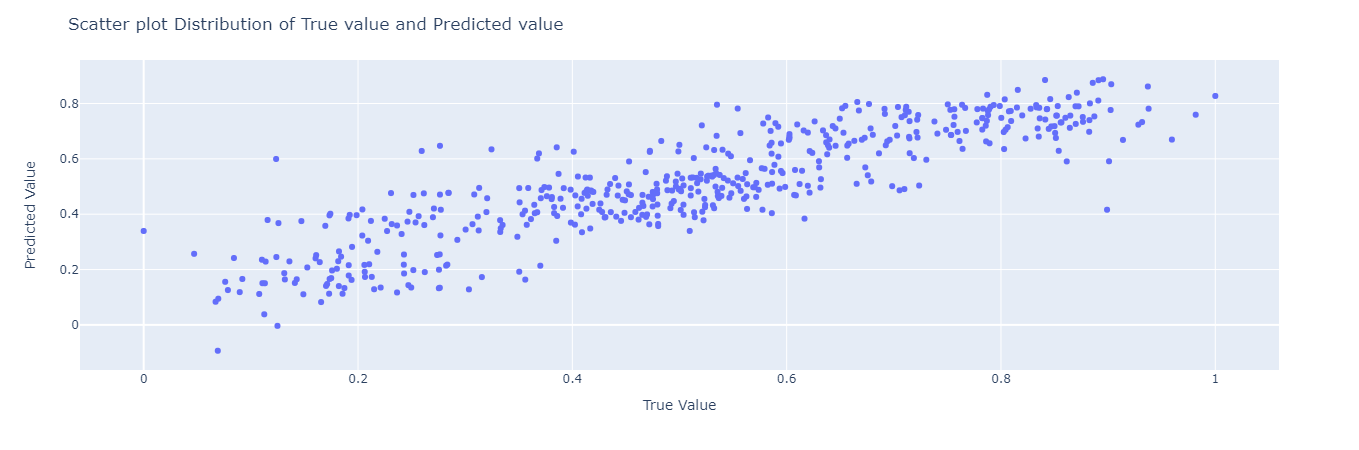

In [88]:
# let's plot the y_tain and y_train_pred to analyse the linear relationship 

fig= px.scatter(x= y_train, y= y_train_pred, labels= {'x': 'True Value', 'y': 'Predicted Value'})
fig.update_layout(title_text= 'Scatter plot Distribution of True value and Predicted value')
fig.show()

<font color= 'orange'><h2>Criteria </h2></font>

- The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis.

- A rule of thumb commonly used in practice is if a VIF is > 10, you have high multicollinearity. In our case, with values less than 5, we are in good shape, and can proceed with our regression

- R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale. And we have the R-square value of 76.3%

- The adjusted R-squared adjusts for the number of terms in the model. And we got it around 75.9%

<font color= 'orange'><h2>Assumptions </h2></font>

- The error terms need to be normally distributed. We have done the Residual analysis and we have got that the error terms are normally distributed. 
- There should be no correlation between the independent variables. This phenomenon is called as the Multicollinearity. To check these criteria, we will be calculating Variance Inflation Factor (VIF). 
    - \>=10, VIF value is definitely high and this are eliminated. 
    - \>5, Can be okay, but it is worth inspecting. 
    - <=5, Good VIF value. No need to eliminate variables. 
    The selected features are having VIF in the following ranges. 
- The scatter plot distribution between the actual values and the predicted values should follow the linear relationship. 


### 7. Making Predictions Using Test Dataset

As of now we are done fitting the model by using the train dataset. Using this model we need to predict the 'Count' in the test dataset. We need to again follw these steps to predict the values in the Test Dataset. 

- Need to scale the continous variables using the MinMax Scalar. 
- Defining the objects X_test & y_test 
- Making prediction using the final model 'lm7'
- Finally, model Evaluation

#### 7.1. Scaling Continous Variables in Test Dataset

In [89]:
# let's check  the test data 

df_test.head()

Year Holiday Workingday  Temperature  Humidity  Windspeed  Count  Spring  \
184    0       1          0    29.793347   63.7917   5.459106   6043       0   
535    1       0          1    32.082500   59.2083   7.625404   6211       0   
299    0       0          0    19.270000   81.2917  13.250121   2659       0   
221    0       0          1    31.433347   42.4167  13.417286   4780       0   
152    0       0          0    29.315000   30.5000  19.583229   4968       0   

     Summer  Winter  ...  Oct  Sep  Mon  Sat  Sun  Thurs  Tue  Wed  \
184       0       0  ...    0    0    0    0    0      0    0    1   
535       1       0  ...    0    0    0    0    0      1    0    0   
299       0       1  ...    1    0    0    1    0      0    0    0   
221       0       0  ...    0    0    0    0    0      0    0    0   
152       1       0  ...    0    0    0    1    0      0    0    0   

     Cloudy_Weather  Light_Snow  
184               1           0  
535               0           0  
299               1           0  
221               0           0  
152               0           0  

[5 rows x 29 columns]

In [90]:
# let's scale the continous variables values 

df_test[num_var]= scalar.transform(df_test[num_var])

In [91]:
# let's describe the df_test 

df_test[num_var].describe()

Temperature    Humidity   Windspeed       Count
count   220.000000  220.000000  220.000000  220.000000
mean      0.558718    0.638221    0.313293    0.522154
std       0.233187    0.148694    0.159584    0.219163
min       0.046591    0.261915   -0.042808    0.048205
25%       0.355429    0.529197    0.198843    0.378595
50%       0.558172    0.625590    0.300126    0.524678
75%       0.755981    0.743798    0.402718    0.677750
max       0.984424    1.002146    0.807474    0.963300

#### 7.2. Defining Objects

In [92]:
# defing the objects 
# y_train --> dependent variable --> Target Count in our case
# X_train --> independent variables --> All other columns 

y_test= df_test.pop('Count')
X_test= df_test

In [93]:
# y_test head values 

y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: Count, dtype: float64

In [94]:
# X_test head values 

X_test.head()

Year Holiday Workingday  Temperature  Humidity  Windspeed  Spring  Summer  \
184    0       1          0     0.831783  0.657364   0.084219       0       0   
535    1       0          1     0.901354  0.610133   0.153728       0       1   
299    0       0          0     0.511964  0.837699   0.334206       0       0   
221    0       0          1     0.881625  0.437098   0.339570       0       0   
152    0       0          0     0.817246  0.314298   0.537414       0       1   

     Winter  Aug  ...  Oct  Sep  Mon  Sat  Sun  Thurs  Tue  Wed  \
184       0    0  ...    0    0    0    0    0      0    0    1   
535       0    0  ...    0    0    0    0    0      1    0    0   
299       1    0  ...    1    0    0    1    0      0    0    0   
221       0    1  ...    0    0    0    0    0      0    0    0   
152       0    0  ...    0    0    0    1    0      0    0    0   

     Cloudy_Weather  Light_Snow  
184               1           0  
535               0           0  
299               1           0  
221               0           0  
152               0           0  

[5 rows x 28 columns]

#### 7.3. Making Predictions

In [95]:
# let's define the columns needed for the predictions 

X_test_lm= X_test[X_train_lm7.columns]

X_test_lm.columns

Index(['Year', 'Holiday', 'Windspeed', 'Spring', 'Summer', 'Winter', 'Sep',
       'Cloudy_Weather', 'Light_Snow'],
      dtype='object')

In [96]:
# let's make the use of our model and predict the values 

X_test_sm= sm.add_constant(X_test_lm)

# making predictions 
y_test_pred= lm7.predict(X_test_sm)

In [97]:
# checking the predicted values on test 

y_test_pred.head()

184    0.375454
535    0.759604
299    0.357898
221    0.521125
152    0.446976
dtype: float64

Now that we have 

#### 7.4. Model Evaluation

We have build the model and let's check some of the parameters so that the model we have built is correct or not. The following: 

- $R^2$ & Adjusted $R^2$
- Scatter Distribution b/w y_test & y_test_pred

#### 7.4.1. Checking $R^2$ and Adjusted $R^2$

In [98]:
# we can calculate the R^2 by using in built function 

r2_test= r2_score(y_true= y_test, y_pred= y_test_pred)

r2_test

0.7419791363256161

The formula for the Adjusted $R^2$ is given by: 

Adjusted $R^2= 1 − \frac{(1−R^2)(N−1)}{(N−p−1)}$

In [99]:
# let's calculate the adjusted R^2 by placing the values manually
# Here R^2 is the r2_test 
# N is the length of samples 
# p is the number of independent Variables 
# let's plugin the values and check the adjusted R^2 values

adj_r2_test= 1 - ((1-r2_test)*(len(X_test_lm)-1))/(len(X_test_lm) - len(X_test_lm.columns) - 1)
adj_r2_test

0.7309210993109996

- Comparing $R^2$ and Adjusted $R^2$ 
    - Test: 74.1% and Train: 76.3%
    - Test: 73.1% and Train: 75.9%
    
This model has given the scores almost the train data scores for the test dataset. 

#### 7.4.2. Scatter Distribution b/w True Values and Predicted Values

Similar to train data, we need to check the Scatter Distribution of True Values and Predicted Values

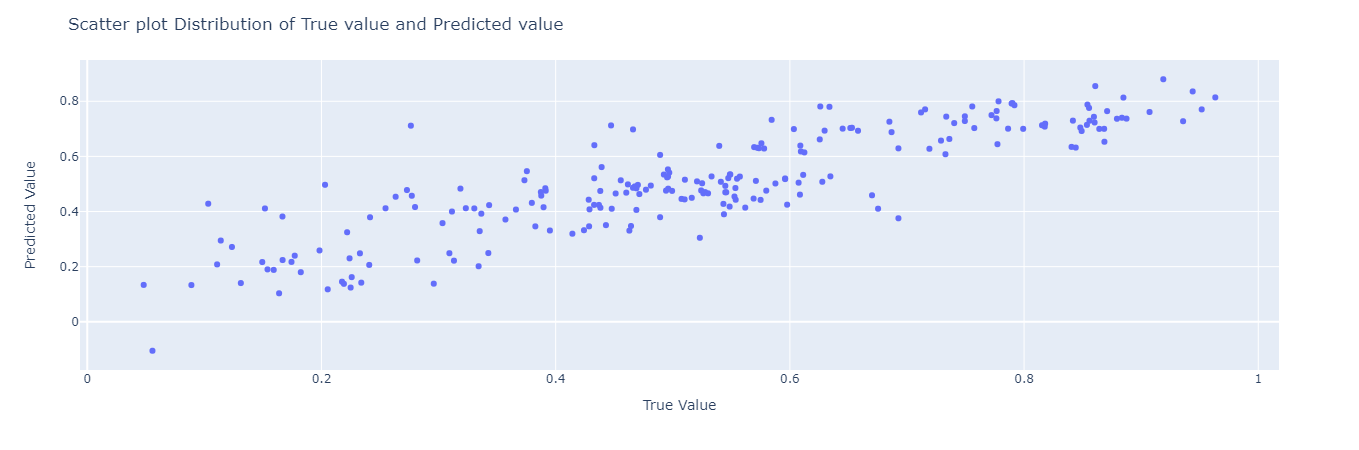

In [100]:
# let's plot the y_test and y_test_pred to analyse the linear relationship

fig= px.scatter(x= y_test, y= y_test_pred, labels= {'x': 'True Value', 'y': 'Predicted Value'})
fig.update_layout(title_text= 'Scatter plot Distribution of True value and Predicted value')

fig.show()

<font color = 'orange'><h2>Inferences</h2></font> 

- The scatter plot distribution is giving almost a linear relationship. 

<font color = 'red'><h1>Model Equation</h1></font> 

From the model that we have defined the equation of the fitted line is given by: 

_count = 0.579 + 0.2472 * Year - 0.1002 * Holiday - 0.1704 * Windspeed - 0.2960 * Spring -0.0404 * Summer - 0.0751 * Winter + 0.0763 * Sep - 0.0890 * Cloudy_weather - 0.2960 * Light_snow_ 

<font color = 'red'><h1>Interpretation</h1></font> 

- As every year the demand of bike sharing has being increased, there will be an increase in the usage of users count. 
- Can focus more in the month of September. 
- As the difference between the Test dataset and train dataset have the $R^2$ 2.2% the model is acceptable.